# Import Core Libraries

In [345]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import pickle

from os import listdir, walk
from os.path import isfile, join

In [346]:
from detect_peaks import detect_peaks

# Load Dataset

In [385]:
%run load_dataset.ipynb

In [464]:
subj_range = np.hstack((np.arange(1001,1013),np.arange(2002,2003)))

all_subjects = [str(i) for i in subj_range]

In [349]:
subj_range = np.hstack((np.arange(2001,2002),np.arange(3001,3006)))

all_patients = [str(i) for i in subj_range]

In [465]:
print(all_subjects)
print(all_patients)

['1001', '1002', '1003', '1004', '1005', '1006', '1007', '1008', '1009', '1010', '1011', '1012', '2002']
['2001', '3001', '3002', '3003', '3004', '3005']


In [466]:
X_all, y_all, subj_all = load_all_data(all_subjects)

Loading 1001's data


/Users/admin/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6701: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Loading 1002's data
Loading 1003's data
Loading 1004's data
Loading 1005's data
Loading 1006's data
Loading 1007's data
Loading 1008's data
Loading 1009's data
Loading 1010's data
Loading 1011's data
Loading 1012's data
Loading 2002's data
Finished loading


In [387]:
X_all_p, y_all_p, subj_all_p = load_all_data(all_patients)

Loading 2001's data
Loading 3001's data
Loading 3002's data
Loading 3003's data
Loading 3004's data
Loading 3005's data
Finished loading


In [389]:
X_all_p.shape

(10998, 3)

# Data Preprocessing

In [413]:
%run preprocessing.ipynb

In [467]:
print(X_all.shape, y_all.shape)

(26742, 3) (26742,)


In [468]:
X_all

array([[-2.99e-01, -9.04e-01, -6.11e-04],
       [-3.05e-01, -9.05e-01,  4.64e-03],
       [-3.01e-01, -9.02e-01,  2.69e-03],
       ...,
       [-8.85e-01,  1.68e-01,  2.51e-01],
       [-9.09e-01,  2.15e-01,  3.25e-01],
       [-9.29e-01, -8.44e-02,  2.33e-01]])

# Group Data by Label and Normalize Data

In [404]:
print(label_list)
print(label_dict)

['sit', 'sleep', 'stand', 'walk']
{'sit': 0, 'sleep': 1, 'stand': 2, 'walk': 3}


In [405]:
new_label_list = [0,1,2,3]
new_label_dict = {
    0: 'sit',
    1: 'sleep',
    2: 'stand',
    3: 'walk'
}

colors = ['r','g','b','navy','turquoise','darkorange']

In [406]:
# group X_all and y_all from load_dataset.ipynb by labels
X_label, y_label = label_grouping(X_all, y_all, subj_all, new_label_list)

# normalize X_label
X_norm = normalize_data(X_label)

## Show Plot for each Activity and Subject

In [360]:
# plot_all_label(X_label, y_all, new_label_list, new_label_dict)

# Calculate Roll, Pitch, Yaw

In [469]:
roll, pitch, yaw = calc_rpy(X_all, colors)
rpy = np.array([roll, pitch, yaw]).transpose()

print(rpy.shape, y_all.shape)

(26742, 3) (26742,)


In [454]:
roll, pitch, yaw = calc_rpy(X_all_p, colors)
rpy_p = np.array([roll, pitch, yaw]).transpose()

print(rpy_p.shape, y_all_p.shape)

(10998, 3) (10998,)


# Apply PCA

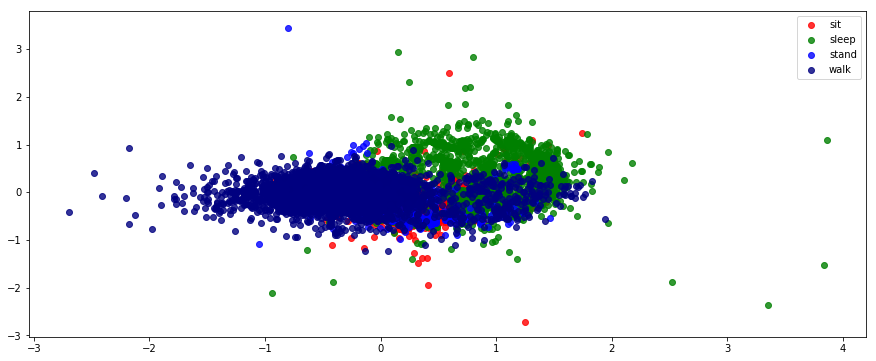

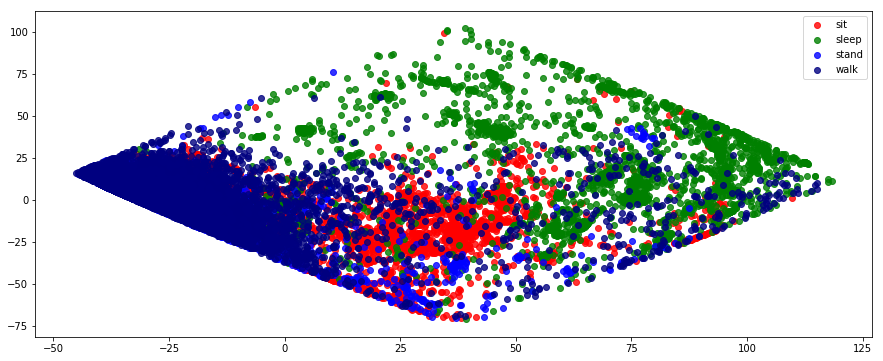

In [470]:
# apply PCA to X_all and rpy
X_pca, pca = apply_pca(X_all, y_all, label_list)
rpy_pca, pca = apply_pca(rpy, y_all, label_list)

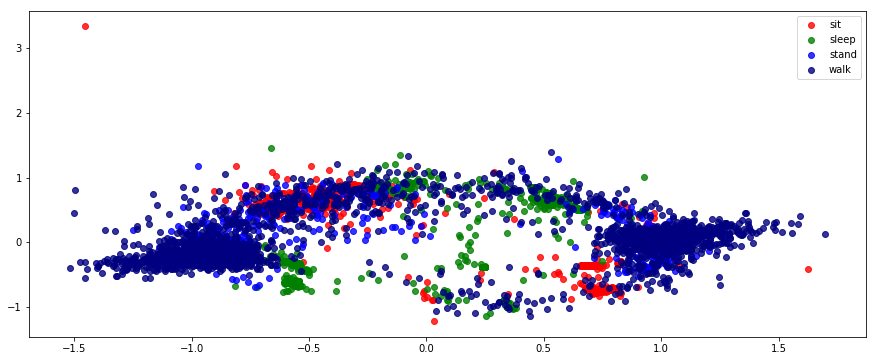

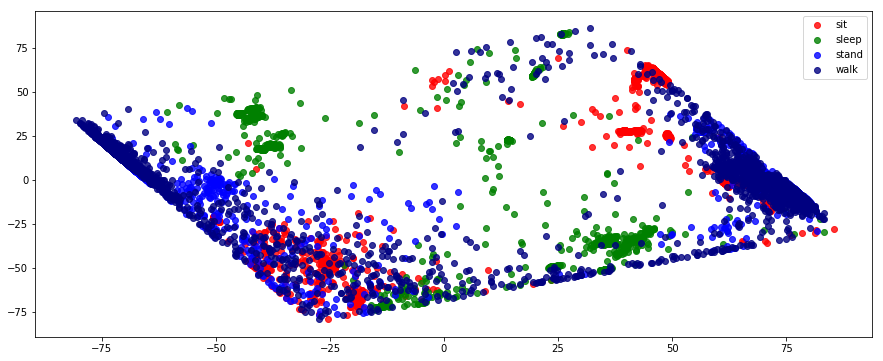

In [456]:
# apply PCA and LDA to X_all and rpy
X_pca_p, pca_p = apply_pca(X_all_p, y_all_p, label_list)
rpy_pca_p, pca_p = apply_pca(rpy_p, y_all_p, label_list)

# Reshape Data (Pure Label)

In [457]:
print(rpy_pca_p.shape, y_all_p.shape, subj_all_p.shape)

(10998, 3) (10998,) (10998,)


In [445]:
# get label-separated X and y
X_pure, y_pure = prepare_pure_label(rpy_pca_p, y_all_p, subj_all_p, all_patients, new_label_list)
y_pure = y_pure.reshape((y_pure.shape[0],))

0 0 (315, 60, 3)
0 1 (315, 60, 3)
0 2 (315, 60, 3)
0 3 (315, 60, 3)
0 4 (315, 60, 3)
0 5 (315, 60, 3)
1 0 (314, 60, 3)
1 1 (315, 60, 3)
1 2 (315, 60, 3)
1 3 (313, 60, 3)
1 4 (321, 60, 3)
1 5 (321, 60, 3)
2 0 (501, 60, 3)
2 1 (514, 60, 3)
2 2 (502, 60, 3)
2 3 (499, 60, 3)
2 4 (502, 60, 3)
2 5 (502, 60, 3)
3 0 (1189, 60, 3)
3 1 (327, 60, 3)
3 2 (315, 60, 3)
3 3 (320, 60, 3)
3 4 (314, 60, 3)
3 5 (308, 60, 3)


In [415]:
print(X_pure.shape, y_pure.shape)

(9582, 180) (9582,)


# Reshape Data (Impure Label)

In [458]:
X_impure, y_impure = prepare_impure_label(rpy_pca_p, y_all_p)

In [459]:
print(X_impure.shape, y_impure.shape)

(10939, 180) (10939,)


# Split Train and Test Set

In [460]:
# Split training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X_pure, y_pure, test_size=0.2, random_state=42)

X_tr, X_te, y_tr, y_te = train_test_split(X_impure, y_impure, test_size=0.2, random_state=42)

print(X_tr.shape)
print(X_te.shape)

(8751, 180)
(2188, 180)


In [461]:
print(X_train.shape)
print(X_test.shape)

(7665, 180)
(1917, 180)


# Find proper thresholds of walk activity

## Patients

In [482]:
X_dict = {
    'id': subj_all_p,
    'x': [X_i[0] for X_i in X_all_p],
    'y': [X_i[1] for X_i in X_all_p],
    'z': [X_i[2] for X_i in X_all_p],
    'x_pca': [X_i_pca[0] for X_i_pca in X_pca_p],
    'y_pca': [X_i_pca[1] for X_i_pca in X_pca_p],
    'z_pca': [X_i_pca[2] for X_i_pca in X_pca_p],
    'roll': [rpy_pca_i[0] for rpy_pca_i in rpy_pca_p],
    'pitch': [rpy_pca_i[1] for rpy_pca_i in rpy_pca_p],
    'yaw': [rpy_pca_i[2] for rpy_pca_i in rpy_pca_p],
    'label': y_all_p
}

df_rpy = pd.DataFrame(X_dict)

In [483]:
df_rpy

id         x         y         z     x_pca     y_pca     z_pca  \
0      2001 -0.363528 -0.920057  0.197522 -0.676597  0.642455 -0.051775   
1      2001 -0.396265 -0.883412  0.212180 -0.690187  0.598579 -0.028978   
2      2001 -0.404571 -0.818426  0.193124 -0.670698  0.533802 -0.037893   
3      2001 -0.396753 -0.926409  0.155501 -0.710681  0.627314 -0.090750   
4      2001 -0.393822 -0.892207  0.199476 -0.692113  0.605323 -0.042961   
5      2001 -0.372323 -0.894161  0.208760 -0.673199  0.617535 -0.036227   
6      2001 -0.403594 -0.872173  0.220486 -0.691782  0.586886 -0.018502   
7      2001 -0.399196 -0.891229  0.210714 -0.696206  0.604112 -0.031217   
8      2001 -0.411412 -0.879991  0.230259 -0.701868  0.592285 -0.009181   
9      2001 -0.415321 -0.872173  0.228793 -0.702130  0.583426 -0.009149   
10     2001 -0.417764 -0.814517  0.257621 -0.678939  0.535682  0.027512   
11     2001 -0.423627 -0.878525  0.202408 -0.713175  0.581233 -0.035201   
12     2001 -0.417764 -0.899536  0.141331 -0.718722  0.592191 -0.098883   
13     2001 -0.412389 -0.891229  0.161853 -0.709683  0.590436 -0.078044   
14     2001 -0.415809 -0.865333  0.182863 -0.701115  0.569385 -0.053403   
15     2001 -0.409457 -0.888298  0.180909 -0.705185  0.592230 -0.059154   
16     2001 -0.413855 -0.879991  0.179443 -0.705681  0.582732 -0.059005   
17     2001 -0.415809 -0.891718  0.182375 -0.712338  0.592905 -0.057552   
18     2001 -0.407014 -0.895138  0.167716 -0.706296  0.597144 -0.073346   
19     2001 -0.413855 -0.877060  0.189215 -0.704127  0.581752 -0.048969   
20     2001 -0.409946 -0.895627  0.170648 -0.709064  0.596859 -0.070233   
21     2001 -0.418741 -0.887321  0.180909 -0.713169  0.587511 -0.058093   
22     2001 -0.419230 -0.883412  0.175534 -0.712120  0.582909 -0.062796   
23     2001 -0.416787 -0.882923  0.183352 -0.709455  0.584797 -0.055269   
24     2001 -0.419718 -0.890741  0.169671 -0.715860  0.588277 -0.069544   
25     2001 -0.420207 -0.884877  0.169671 -0.713812  0.582830 -0.068680   
26     2001 -0.416787 -0.887321  0.168693 -0.711786  0.586267 -0.070323   
27     2001 -0.400662 -0.892207  0.167228 -0.699319  0.597070 -0.074053   
28     2001 -0.413366 -0.890252  0.157944 -0.710276  0.588500 -0.081662   
29     2001 -0.408969 -0.891229  0.158921 -0.706681  0.591359 -0.081273   
...     ...       ...       ...       ...       ...       ...       ...   
10968  3005  0.970018  0.297687  0.409702  1.053893  0.141048  0.193707   
10969  3005  0.840047  0.275211  0.442439  0.927788  0.112830  0.235784   
10970  3005  0.962689  0.225861  0.203996  1.010263  0.167691 -0.018223   
10971  3005  0.684180  0.178954  0.166373  0.737171  0.087986 -0.034068   
10972  3005  1.159600  0.115435  0.216211  1.141895  0.350076 -0.041152   
10973  3005  1.212370  0.164785  0.356443  1.215025  0.351354  0.098617   
10974  3005  0.835161  0.273257  0.358397  0.919886  0.098430  0.153196   
10975  3005  0.943144  0.395898  0.505470  1.074319  0.058159  0.304393   
10976  3005  1.005687  0.311857  0.301718  1.088777  0.124995  0.085731   
10977  3005  0.907476  0.155501  0.074025  0.926321  0.185922 -0.150559   
10978  3005  0.691998  0.163319  0.151714  0.737140  0.102747 -0.051463   
10979  3005  1.021322  0.199476  0.159532  1.050701  0.208104 -0.071540   
10980  3005  1.401463  0.300130  0.399441  1.444955  0.315817  0.140959   
10981  3005  0.756983  0.339219  0.284617  0.874847 -0.005355  0.097459   
10982  3005  0.963178  0.418863  0.279731  1.095078  0.007971  0.083176   
10983  3005  0.990051  0.288892  0.225495  1.062471  0.126251  0.008995   
10984  3005  1.026697  0.332379  0.052037  1.108627  0.073373 -0.159513   
10985  3005  0.708610  0.282540  0.102364  0.801257 -0.005318 -0.085169   
10986  3005  0.790209  0.259575  0.213279  0.868826  0.067661  0.012792   
10987  3005  0.807310  0.304528  0.317354  0.906677  0.052023  0.119878   
10988  3005  0.828321  0.386126  0.252857  0.958313 -0.023111  0.065581   
10989  3005  0.861058  0.362184  0

In [484]:
df_walk = df_rpy[df_rpy['label']==label_dict['walk']]
df_walk = df_walk.reset_index(drop=True)

In [485]:
df_nonwalk = df_rpy[df_rpy['label']!=label_dict['walk']]
df_nonwalk = df_nonwalk.reset_index(drop=True)

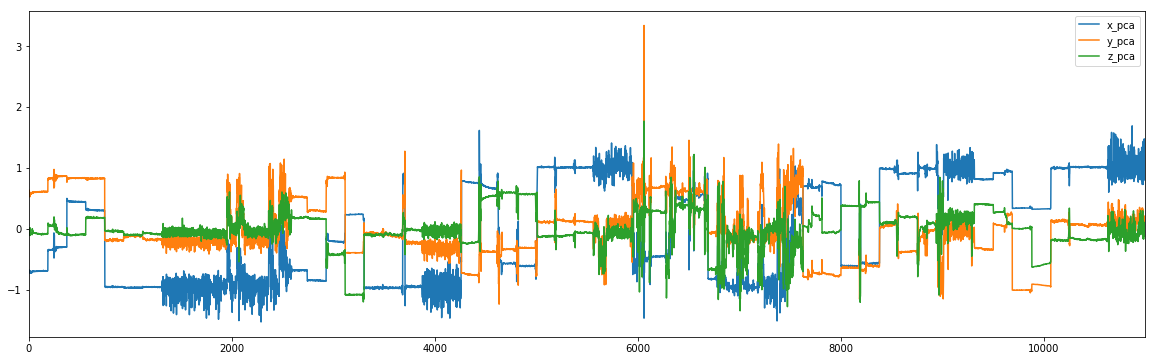

In [486]:
cols = ['x_pca', 'y_pca', 'z_pca']

df_rpy[cols].plot(figsize=(20,6))
plt.show()

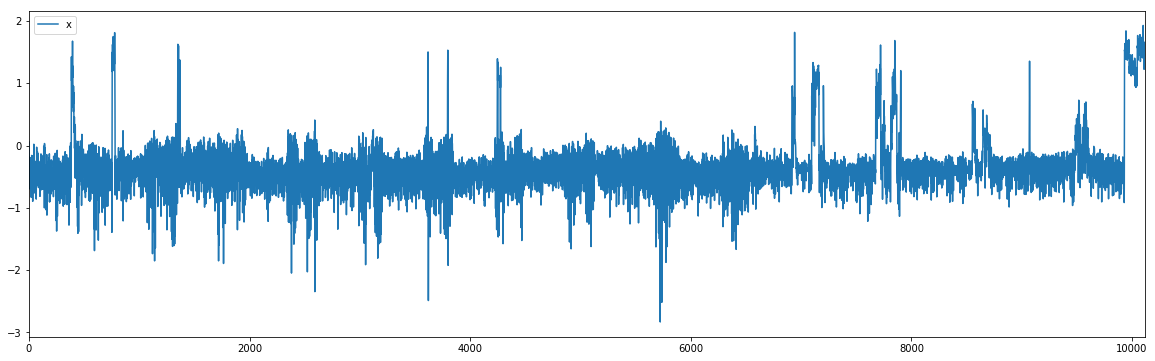

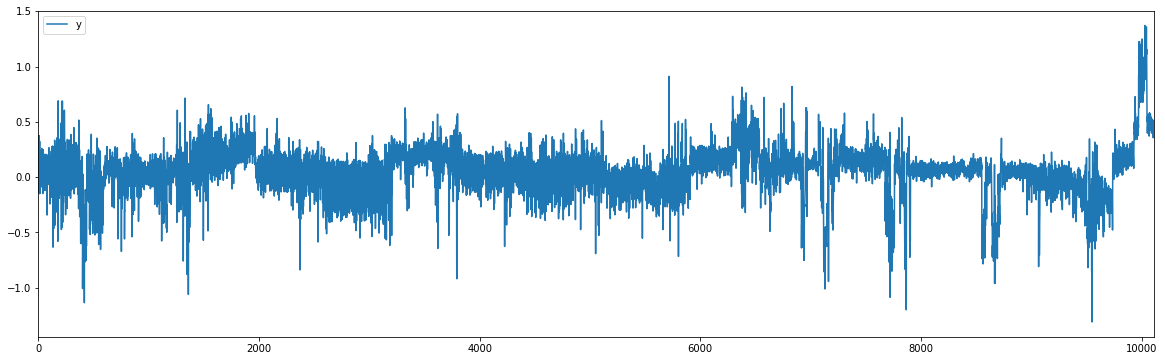

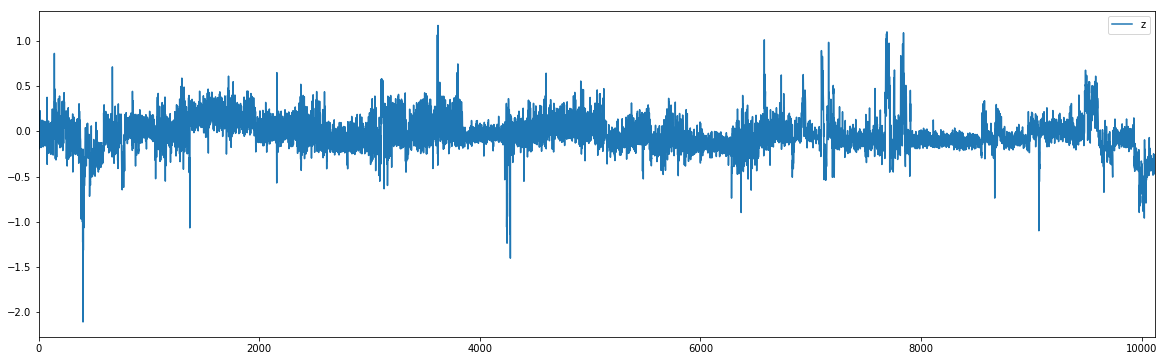

In [376]:
cols = ['x_pca', 'y_pca', 'z_pca']

for c in cols:
    f, ax = plt.subplots()
    df_walk[c].plot(figsize=(20,6), ax=ax)
    ax.legend(c)
    
    plt.show()

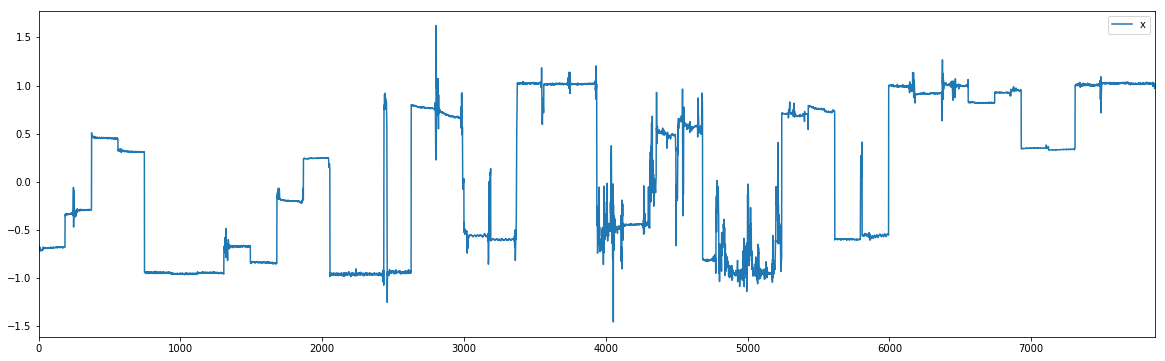

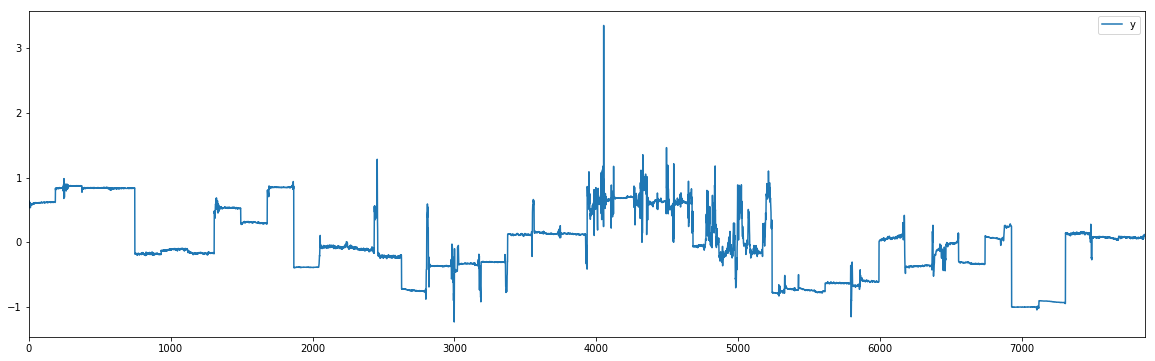

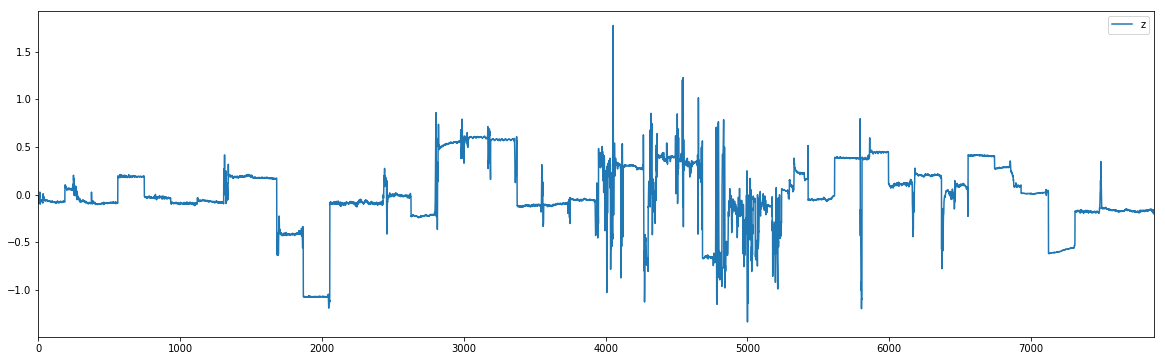

In [430]:
cols = ['x_pca', 'y_pca', 'z_pca']

for c in cols:
    f, ax = plt.subplots()
    df_nonwalk[c].plot(figsize=(20,6), ax=ax)
    ax.legend(c)
    
    plt.show()

2001


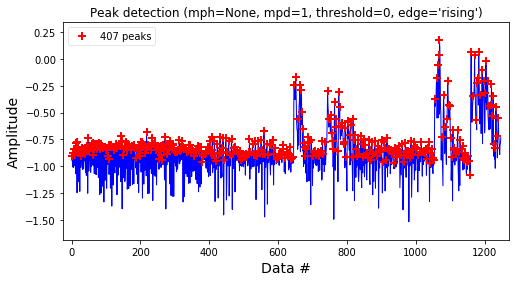

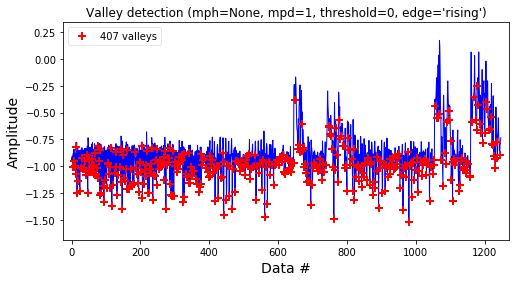

x_pca 0.2265195128807055


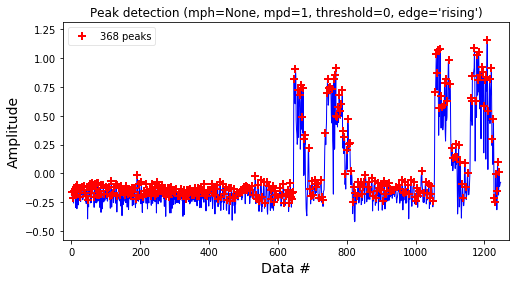

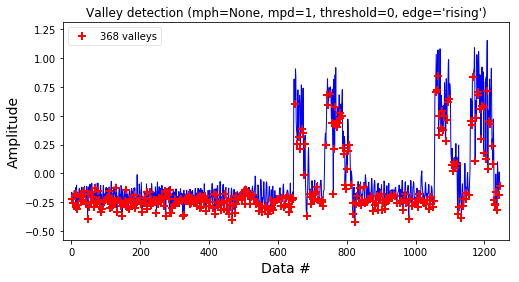

y_pca 0.14666423634220918


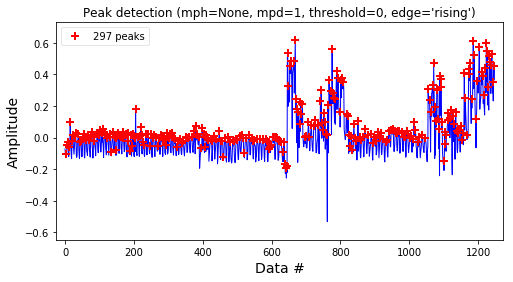

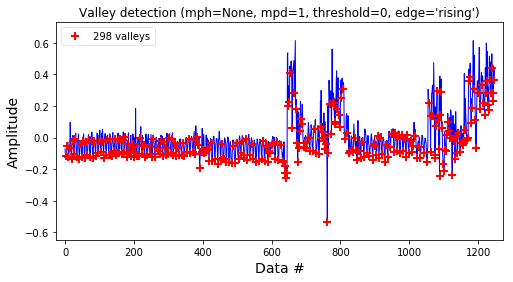

z_pca 0.11599854379944943
3001


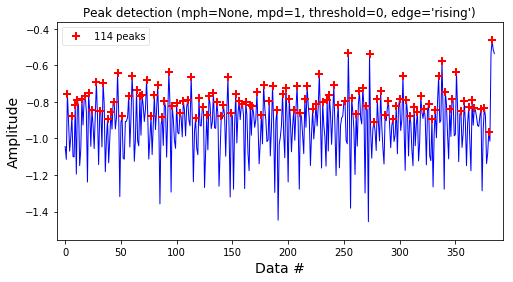

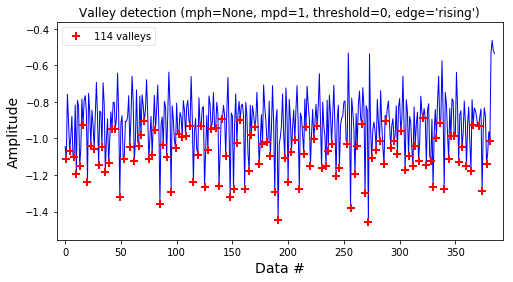

x_pca 0.3111899871580204


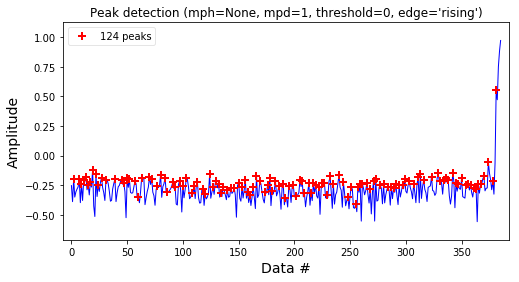

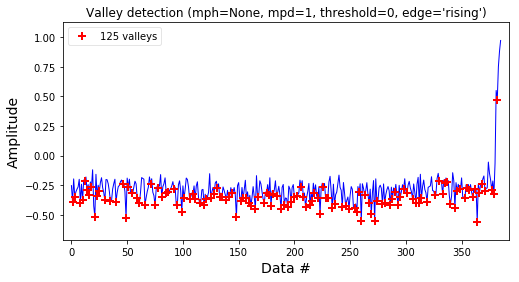

y_pca 0.13544946294460344


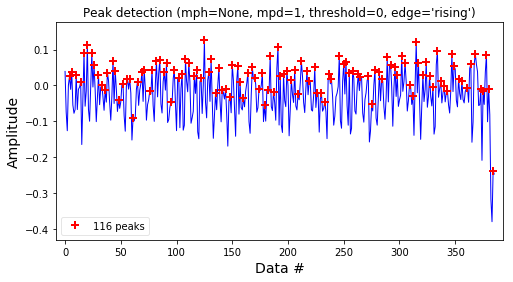

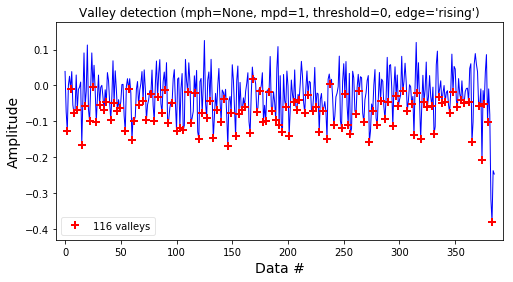

z_pca 0.10794444917943041
3002


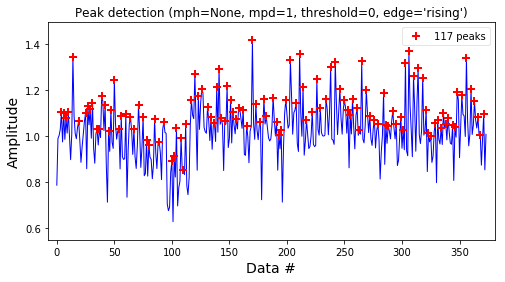

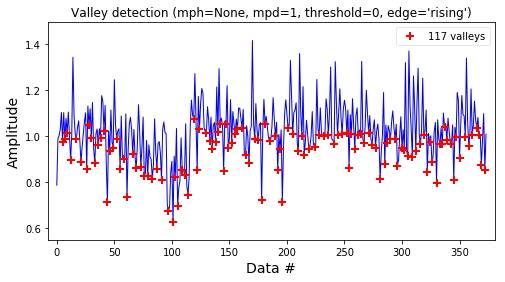

x_pca 0.18949080809129587


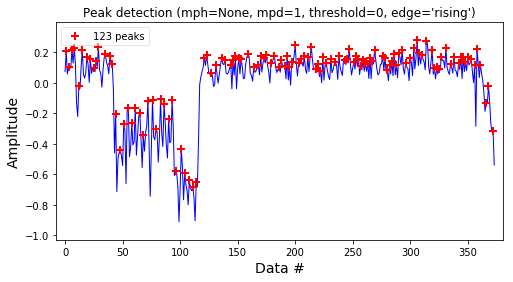

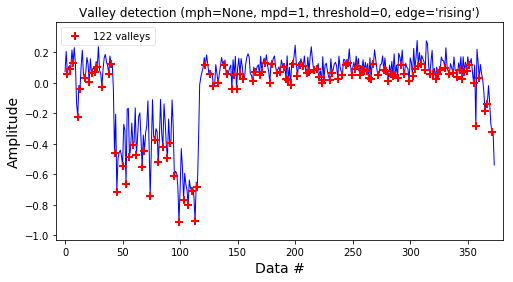

y_pca 0.14051979527649747


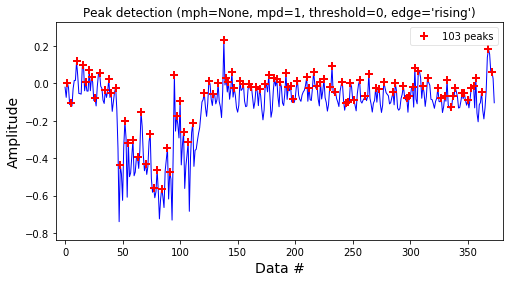

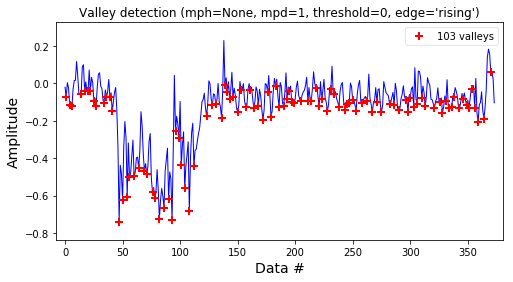

z_pca 0.12835630428020098
3003


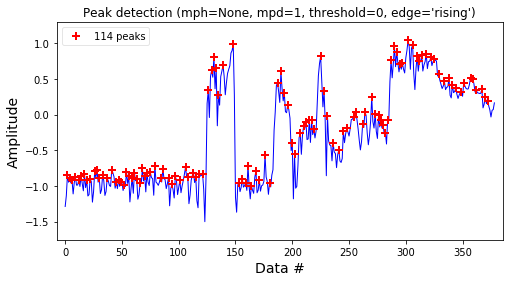

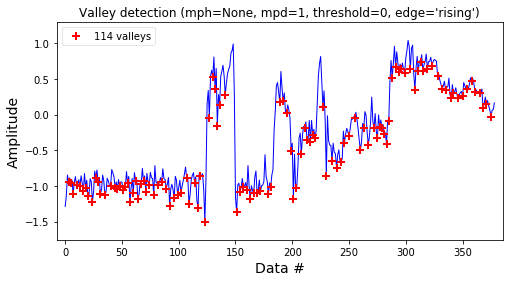

x_pca 0.26203768294268864


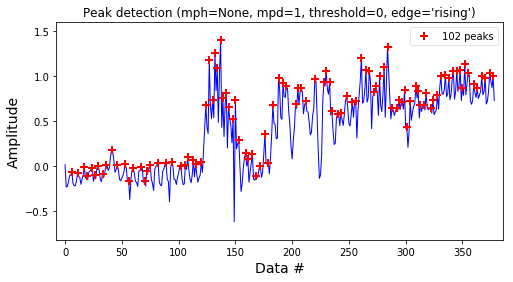

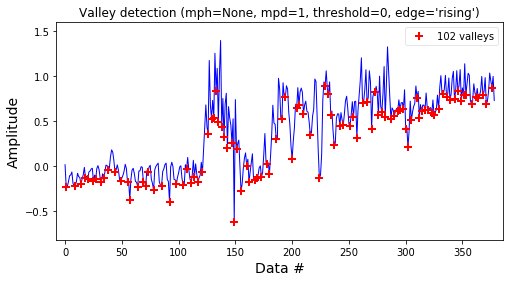

y_pca 0.28437831647167133


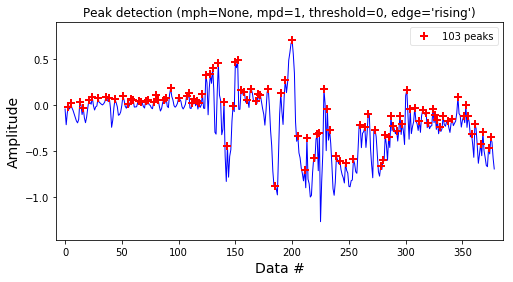

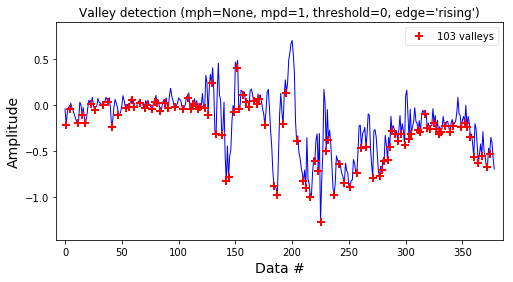

z_pca 0.2209686079230343
3004


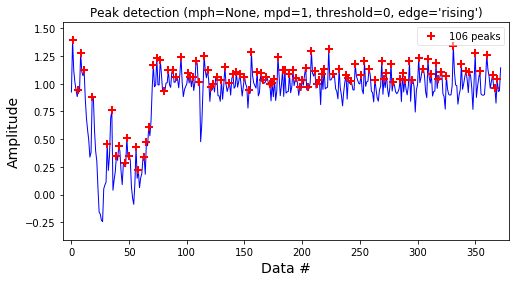

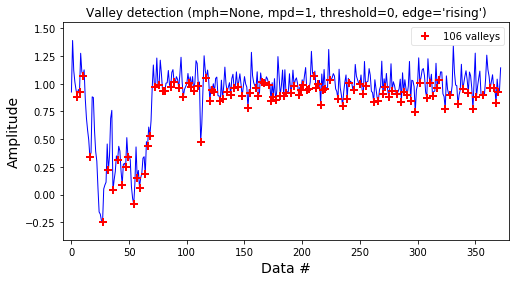

x_pca 0.20931577820650807


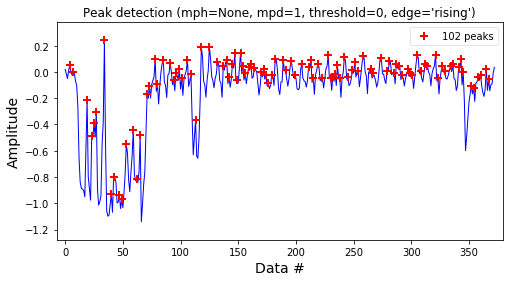

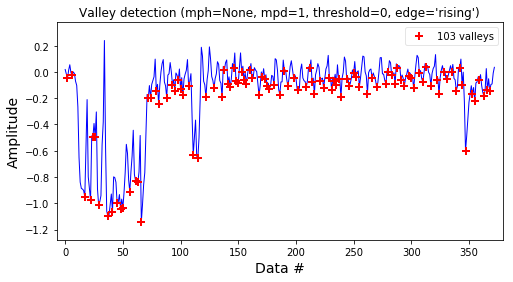

y_pca 0.16795172265516214


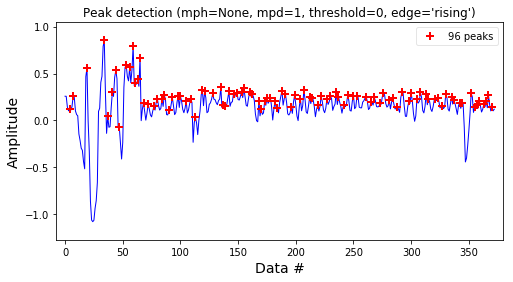

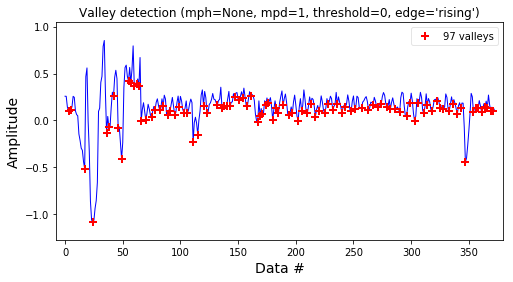

z_pca 0.17402804396487492
3005


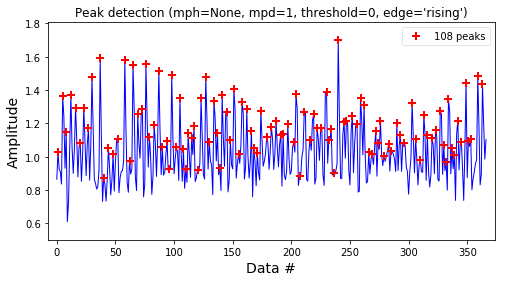

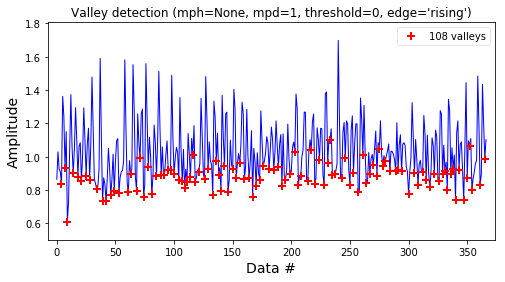

x_pca 0.3123384989039378


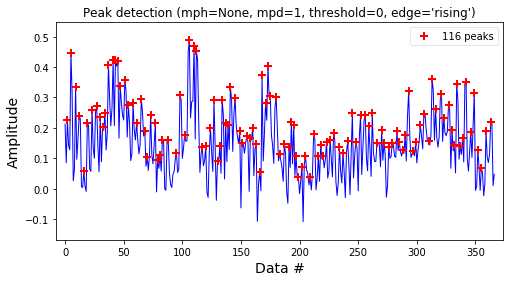

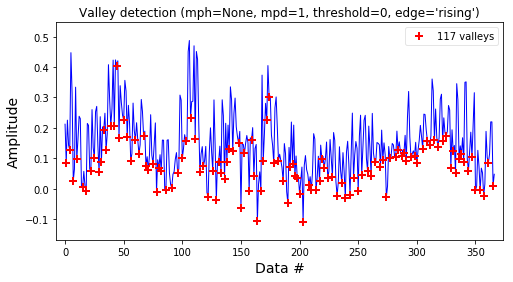

y_pca 0.13795058106856156


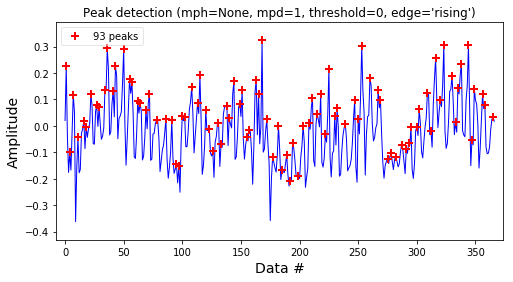

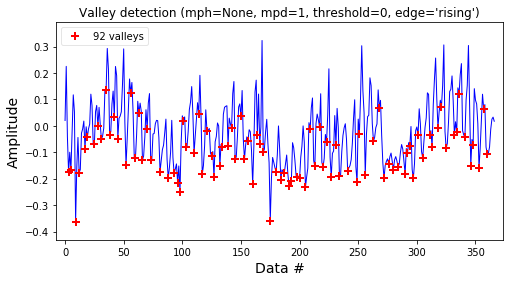

z_pca 0.16196958192528238


In [487]:
cols = ['x_pca', 'y_pca', 'z_pca']
all_avg_diff = [[],[],[]]

for subj_i in all_patients:
    df_walk_i = df_walk[df_walk['id']==subj_i]
    df_walk_i = df_walk_i.reset_index(drop=True)
    
    print(subj_i)
    
    for i in range(len(cols)):
        c = cols[i]
        
        peak_idx = detect_peaks(df_walk_i[c], show=True)    
        valley_idx = detect_peaks(df_walk_i[c], valley=True, show=True)

        peak_point = [df_walk_i.loc[i, c] for i in peak_idx]    
        valley_point = [df_walk_i.loc[i, c] for i in valley_idx]

        min_length = min(len(peak_idx), len(valley_idx))

        diff_peak_valley = [np.abs(peak_point[i] - valley_point[i]) for i in range(min_length)]
        avg_diff_pv = np.mean(diff_peak_valley)

#         print(diff_peak_valley)
        print(c, avg_diff_pv)
        
        all_avg_diff[i].append(avg_diff_pv)
        
all_avg_diff = np.array(all_avg_diff)

2001


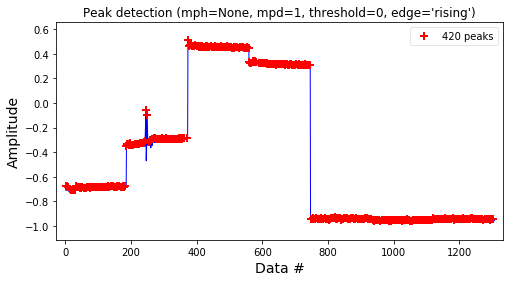

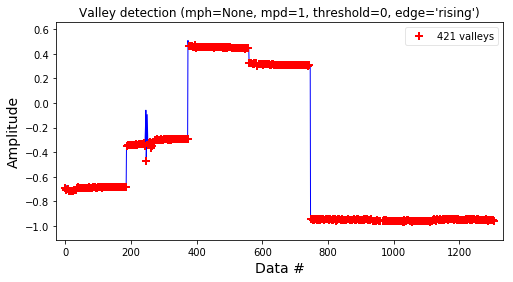

x_pca 0.010504655470915654


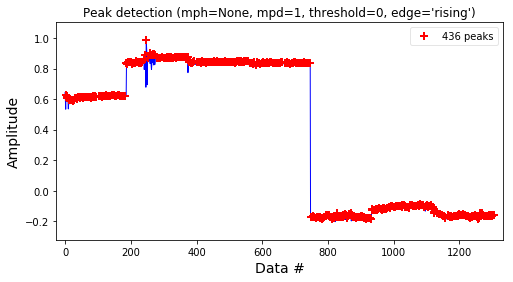

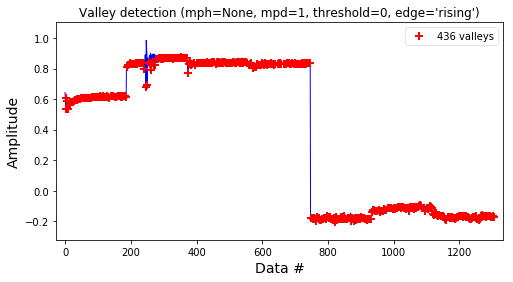

y_pca 0.011429880929896323


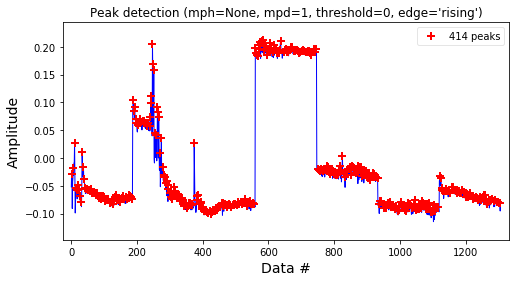

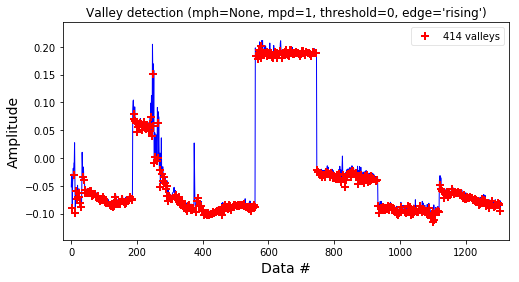

z_pca 0.011124167689429323
3001


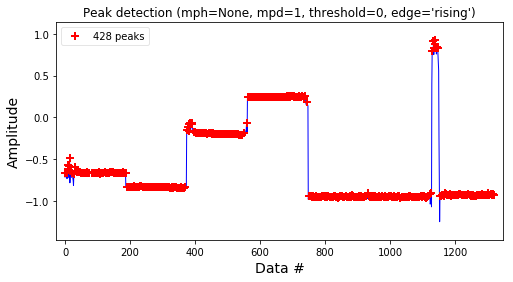

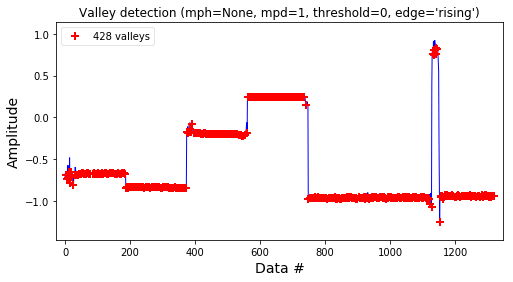

x_pca 0.021611381198632044


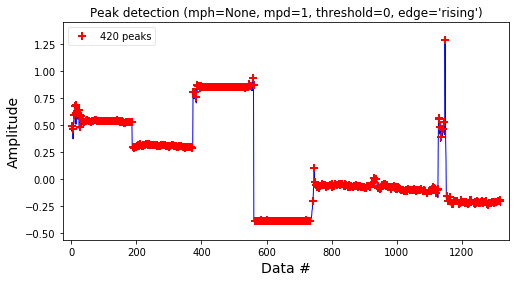

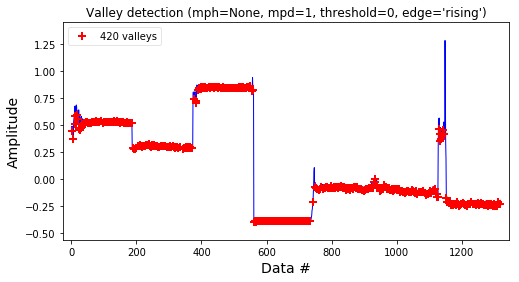

y_pca 0.022398977108531403


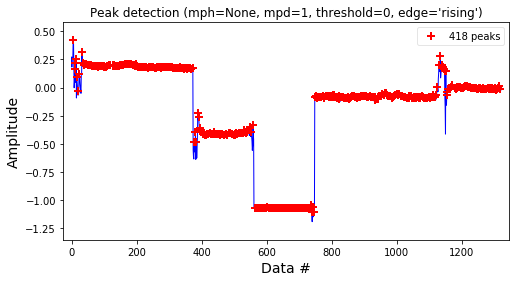

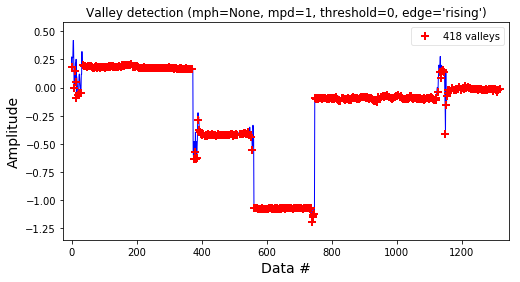

z_pca 0.02120428813906454
3002


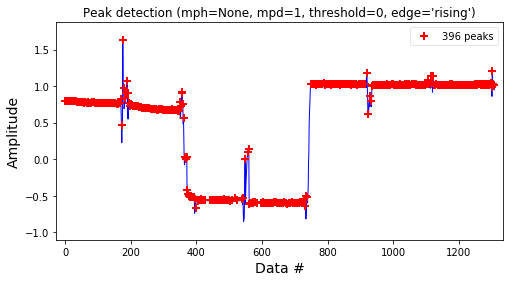

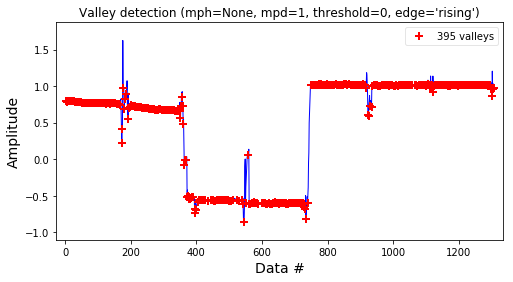

x_pca 0.0286315157976632


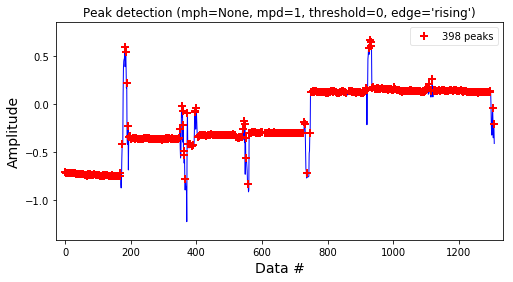

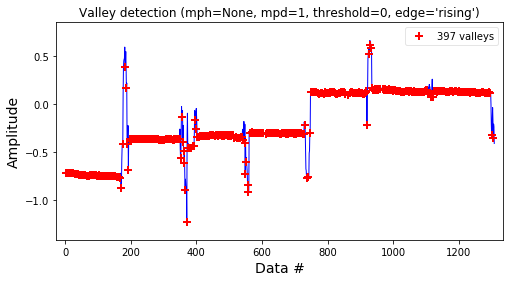

y_pca 0.028033433677914065


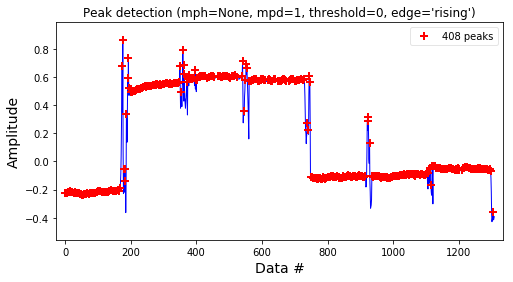

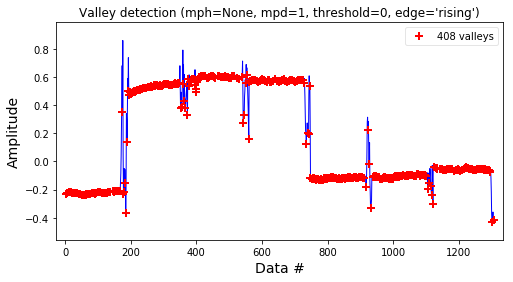

z_pca 0.02625210385320224
3003


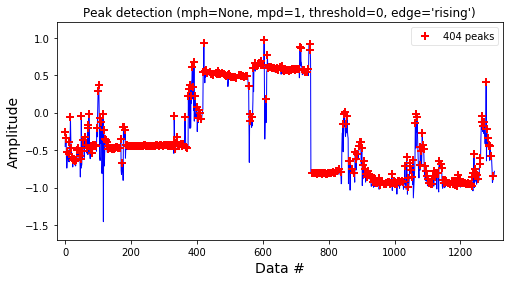

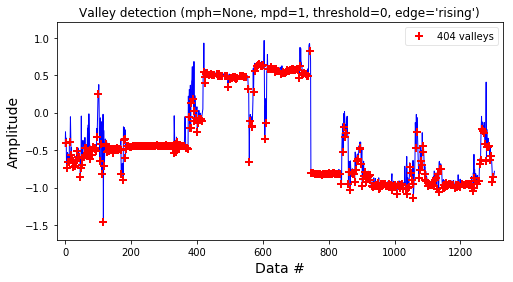

x_pca 0.10828893517131939


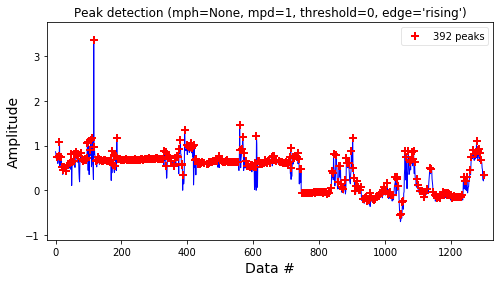

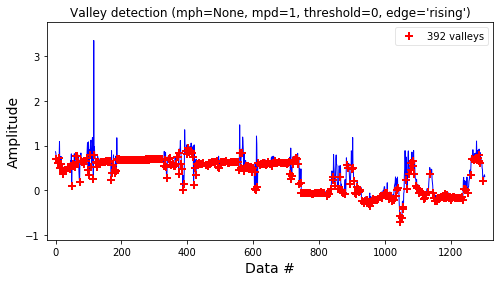

y_pca 0.13199920827227535


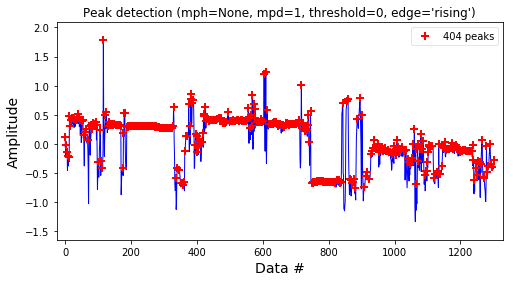

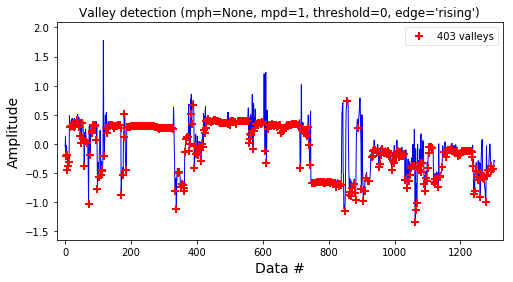

z_pca 0.15941510631080016
3004


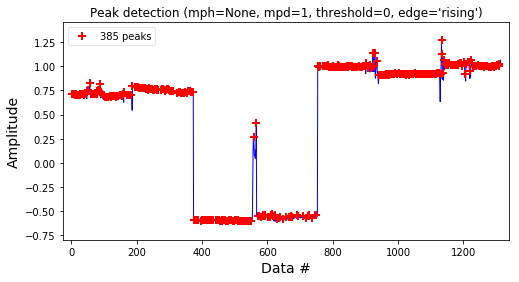

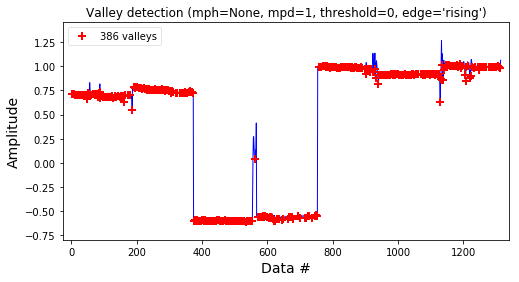

x_pca 0.02222692375881811


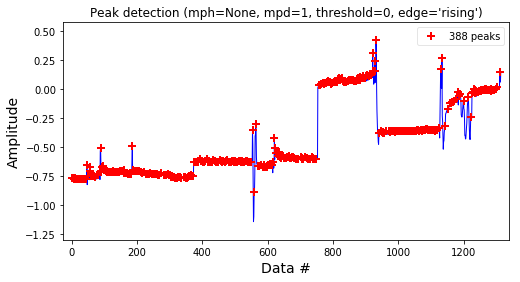

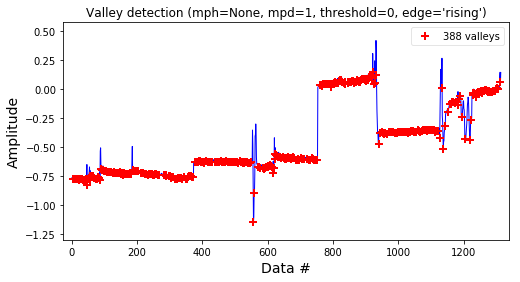

y_pca 0.02359138329537087


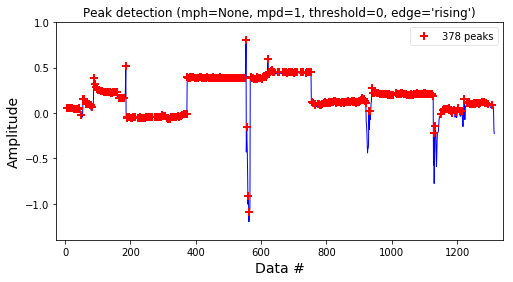

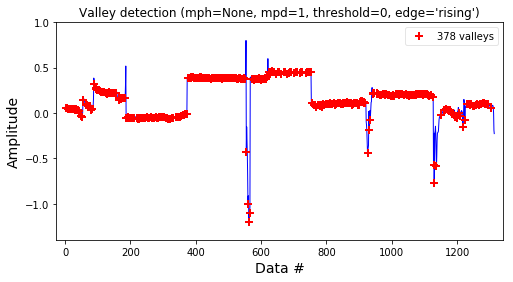

z_pca 0.026629715331687953
3005


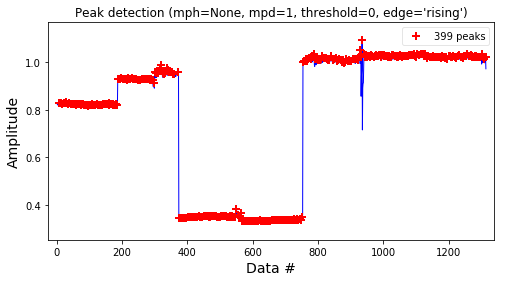

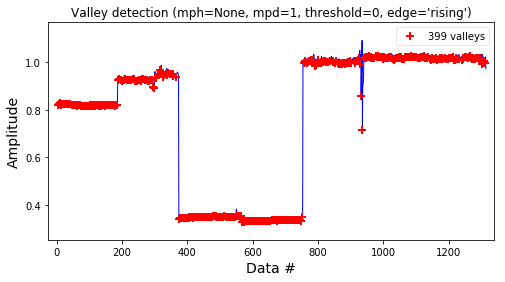

x_pca 0.00924567255009481


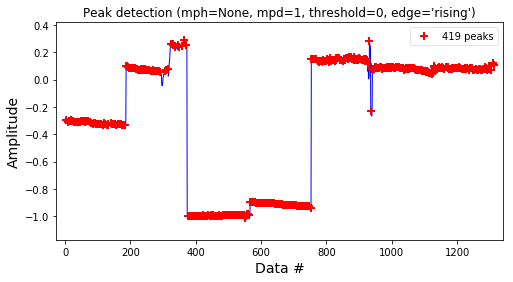

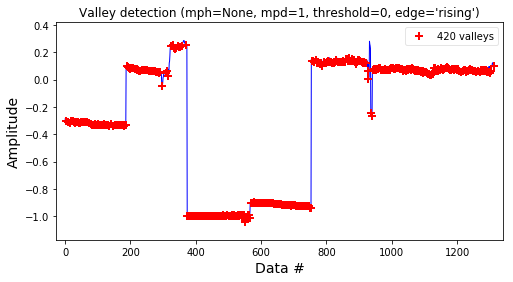

y_pca 0.017298180438181203


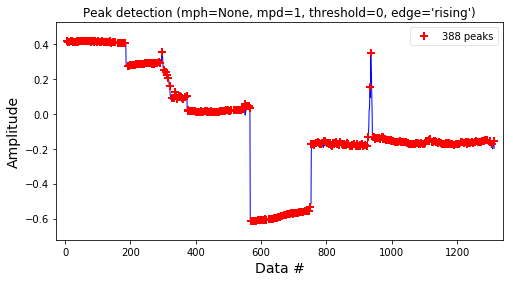

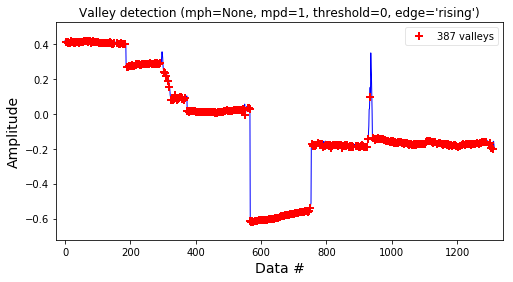

z_pca 0.006793673230643352


In [491]:
cols = ['x_pca', 'y_pca', 'z_pca']
all_avg_diff_nw = [[],[],[]]

for subj_i in all_patients:
    df_nonwalk_i = df_nonwalk[df_nonwalk['id']==subj_i]
    df_nonwalk_i = df_nonwalk_i.reset_index(drop=True)
    
    print(subj_i)
    
    for i in range(len(cols)):
        c = cols[i]
        
        peak_idx = detect_peaks(df_nonwalk_i[c], show=True)    
        valley_idx = detect_peaks(df_nonwalk_i[c], valley=True, show=True)

        peak_point = [df_nonwalk_i.loc[i, c] for i in peak_idx]    
        valley_point = [df_nonwalk_i.loc[i, c] for i in valley_idx]

        min_length = min(len(peak_idx), len(valley_idx)) - 1

        diff_peak_valley = [np.abs(peak_point[i] - valley_point[i]) for i in range(min_length)]
        avg_diff_pv = np.mean(diff_peak_valley)

    #     print(diff_peak_valley)
        print(c, avg_diff_pv)
        
        all_avg_diff_nw[i].append(avg_diff_pv)
        
all_avg_diff_nw = np.array(all_avg_diff_nw)

In [504]:
aad_t = all_avg_diff.transpose()

print('walking for patients')
for i in range(len(aad_t)):
    print(all_patients[i], aad_t[i])
    
aad_nw_t = all_avg_diff_nw.transpose()

print()
print('non-walking for patients')
for i in range(len(aad_nw_t)):
    print(all_patients[i], aad_nw_t[i])

walking for patients
2001 [0.23 0.15 0.12]
3001 [0.31 0.14 0.11]
3002 [0.19 0.14 0.13]
3003 [0.26 0.28 0.22]
3004 [0.21 0.17 0.17]
3005 [0.31 0.14 0.16]

non-walking for patients
2001 [0.01 0.01 0.01]
3001 [0.02 0.02 0.02]
3002 [0.03 0.03 0.03]
3003 [0.11 0.13 0.16]
3004 [0.02 0.02 0.03]
3005 [0.01 0.02 0.01]


In [536]:
three_sec = 20   # 3 sec/0.16 sec = 18.75 time point
one_sec = 6      # 1 sec/0.16 sec = 6.25 time point

cols = ['x_pca', 'y_pca', 'z_pca']
threshold = [0.15, 0.13, 0.11]

exceed_thres = [[],[],[]]

for cl in range(len(cols)):
    c = cols[cl]
    
    for i in range(0, len(df_walk)-three_sec, one_sec):
        df_walk_i = [df_walk.loc[j, c] for j in range(i,i+three_sec)]
        
        peak_idx = detect_peaks(df_walk_i)    
        valley_idx = detect_peaks(df_walk_i, valley=True)

        peak_point = [df_walk_i[j] for j in peak_idx]    
        valley_point = [df_walk_i[j] for j in valley_idx]

        min_length = min(len(peak_idx), len(valley_idx))

        diff_peak_valley = [np.abs(peak_point[i] - valley_point[i]) for i in range(min_length)]
        diff_peak_valley = np.array(diff_peak_valley)
        
        exceed = len(diff_peak_valley[diff_peak_valley>=threshold[cl]])
        exceed_thres[cl].append(exceed)

In [535]:
three_sec = 20   # 3 sec/0.16 sec = 18.75 time point
one_sec = 6      # 1 sec/0.16 sec = 6.25 time point

cols = ['x_pca', 'y_pca', 'z_pca']
threshold = [0.15, 0.13, 0.11]

exceed_thres_nw = [[],[],[]]

for cl in range(len(cols)):
    c = cols[cl]
    
    for i in range(0, len(df_nonwalk)-three_sec, one_sec):
        df_nonwalk_i = [df_nonwalk.loc[j, c] for j in range(i,i+three_sec)]
        
        peak_idx = detect_peaks(df_nonwalk_i)    
        valley_idx = detect_peaks(df_nonwalk_i, valley=True)

        peak_point = [df_nonwalk_i[j] for j in peak_idx]    
        valley_point = [df_nonwalk_i[j] for j in valley_idx]

        min_length = min(len(peak_idx), len(valley_idx))

        diff_peak_valley = [np.abs(peak_point[i] - valley_point[i]) for i in range(min_length)]
        diff_peak_valley = np.array(diff_peak_valley)
        
        exceed = len(diff_peak_valley[diff_peak_valley>=threshold[cl]])
        exceed_thres_nw[cl].append(exceed)

In [526]:
import seaborn as sns

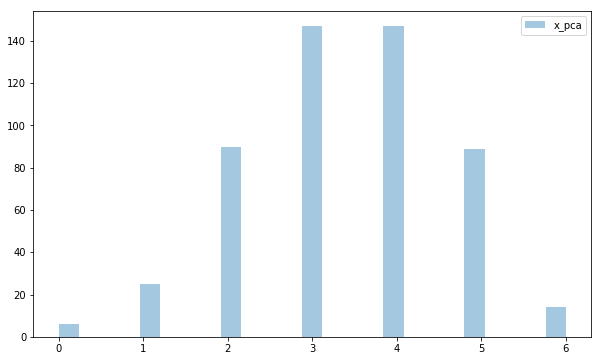

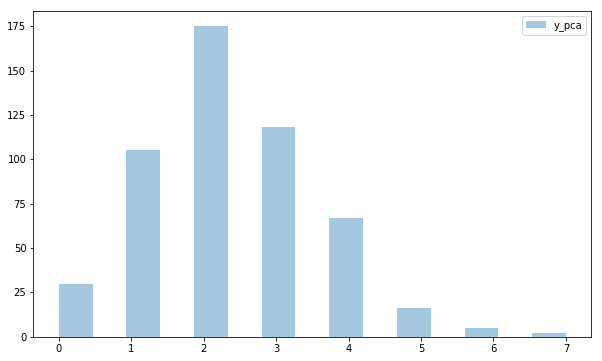

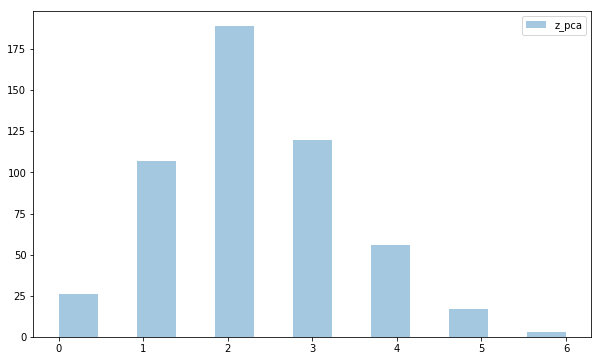

In [532]:
for i in range(3):
    f, axis = plt.subplots(figsize=(10,6))
    ax = sns.distplot(exceed_thres[i], kde=False, ax=axis, label=cols[i])
    ax.legend()

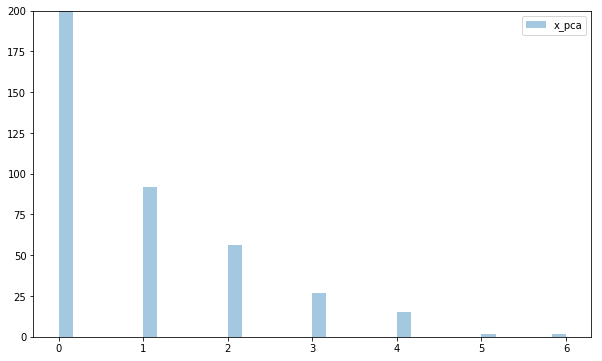

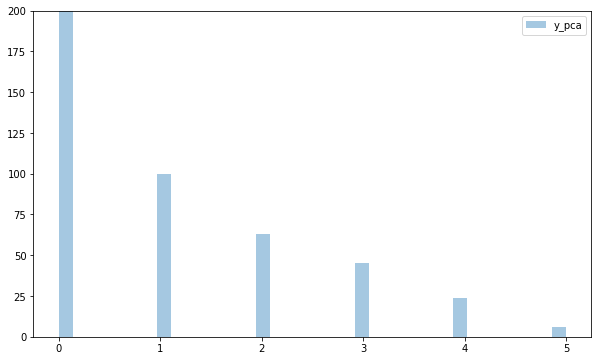

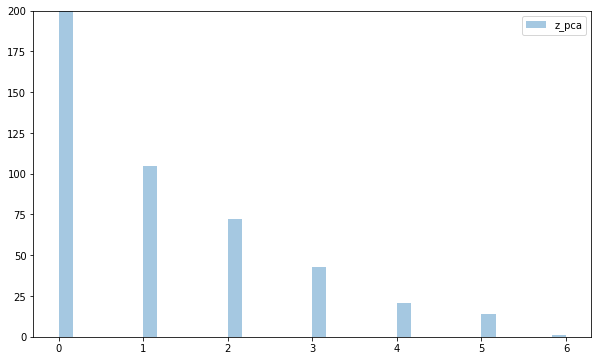

In [534]:
for i in range(3):
    f, axis = plt.subplots(figsize=(10,6))
    ax = sns.distplot(exceed_thres_nw[i], kde=False, ax=axis, label=cols[i])
    ax.legend()
    ax.set_ylim(0,200)

## Normal People

In [494]:
X_dict_1 = {
    'id': subj_all,
    'x': [X_i[0] for X_i in X_all],
    'y': [X_i[1] for X_i in X_all],
    'z': [X_i[2] for X_i in X_all],
    'x_pca': [X_i_pca[0] for X_i_pca in X_pca],
    'y_pca': [X_i_pca[1] for X_i_pca in X_pca],
    'z_pca': [X_i_pca[2] for X_i_pca in X_pca],
    'roll': [rpy_pca_i[0] for rpy_pca_i in rpy_pca],
    'pitch': [rpy_pca_i[1] for rpy_pca_i in rpy_pca],
    'yaw': [rpy_pca_i[2] for rpy_pca_i in rpy_pca],
    'label': y_all
}

df_rpy_1 = pd.DataFrame(X_dict_1)

In [495]:
df_rpy_1

id         x         y         z     x_pca     y_pca     z_pca  \
0      1001 -0.299275 -0.903567 -0.000611  0.192660 -0.586995 -0.479748   
1      1001 -0.304650 -0.905033  0.004642  0.189552 -0.589161 -0.473094   
2      1001 -0.301230 -0.901612  0.002687  0.192232 -0.585537 -0.475722   
3      1001 -0.307215 -0.926532  0.002199  0.184699 -0.609990 -0.477261   
4      1001 -0.308681 -0.922623 -0.005008  0.180930 -0.605001 -0.482764   
5      1001 -0.309658 -0.929952 -0.005008  0.179492 -0.612228 -0.483384   
6      1001 -0.314544 -0.921645 -0.008429  0.174300 -0.603419 -0.483524   
7      1001 -0.309658 -0.921645 -0.014781  0.176438 -0.602525 -0.491196   
8      1001 -0.309658 -0.927020 -0.014292  0.176229 -0.607911 -0.491477   
9      1001 -0.311124 -0.927020 -0.011849  0.175789 -0.608261 -0.488684   
10     1001 -0.311613 -0.927509 -0.006474  0.177315 -0.609558 -0.483648   
11     1001 -0.308681 -0.927509 -0.011849  0.178012 -0.608783 -0.489681   
12     1001 -0.306727 -0.921645 -0.013803  0.179514 -0.602722 -0.491420   
13     1001 -0.306238 -0.933372 -0.019667  0.176915 -0.613420 -0.498556   
14     1001 -0.313567 -0.927998 -0.023087  0.169251 -0.607469 -0.498162   
15     1001 -0.314056 -0.902590 -0.016246  0.173214 -0.583402 -0.488280   
16     1001 -0.312590 -0.928486 -0.006963  0.176157 -0.610434 -0.483855   
17     1001 -0.316010 -0.917737 -0.015269  0.170669 -0.598487 -0.488692   
18     1001 -0.311124 -0.931418 -0.023576  0.171077 -0.610813 -0.500004   
19     1001 -0.323828 -0.922623 -0.003542  0.167478 -0.604984 -0.475649   
20     1001 -0.306727 -0.927998 -0.013315  0.179234 -0.609073 -0.491833   
21     1001 -0.316010 -0.927998 -0.007451  0.172848 -0.609822 -0.482932   
22     1001 -0.309170 -0.931418 -0.019178  0.174530 -0.611517 -0.496727   
23     1001 -0.311613 -0.922134  0.004153  0.181687 -0.605873 -0.473202   
24     1001 -0.302329 -0.927509 -0.015269  0.182602 -0.608362 -0.495231   
25     1001 -0.308681 -0.925554 -0.015269  0.176873 -0.606329 -0.492545   
26     1001 -0.311613 -0.923600 -0.019667  0.172659 -0.603678 -0.495184   
27     1001 -0.311613 -0.917737 -0.009894  0.176746 -0.599379 -0.485453   
28     1001 -0.307215 -0.924577 -0.025041  0.174640 -0.603892 -0.501908   
29     1001 -0.312590 -0.921645  0.001222  0.179721 -0.604926 -0.475444   
...     ...       ...       ...       ...       ...       ...       ...   
26712  2002 -0.479573 -0.274478  0.612598  0.301516 -0.056302  0.234955   
26713  2002 -0.407747  0.020522  0.802668  0.460599  0.204970  0.421343   
26714  2002 -0.486414 -0.043853  0.776283  0.373308  0.146653  0.418484   
26715  2002 -0.595374 -0.126917  0.793873  0.273121  0.063627  0.464859   
26716  2002 -0.669644 -0.149393  0.769443  0.193681  0.046341  0.467784   
26717  2002 -0.776161 -0.328714  0.851041  0.112705 -0.141626  0.558732   
26718  2002 -0.821602 -0.288159  0.484093 -0.063763 -0.044702  0.245962   
26719  2002 -0.802546 -0.762602  0.726933  0.010201 -0.550948  0.396542   
26720  2002 -0.449768 -0.274967  0.700548  0.361968 -0.070713  0.303960   
26721  2002 -0.478596 -0.230503  0.893550  0.410842 -0.055838  0.497475   
26722  2002 -0.321751  0.176878  0.693219  0.510501  0.374833  0.309638   
26723  2002 -0.811830 -0.290114  0.775795  0.054369 -0.091405  0.508741   
26724  2002 -0.663292 -0.173335  0.707389  0.174568  0.032074  0.405371   
26725  2002 -0.708733 -0.093691  0.655107  0.118792  0.119493  0.385664   
26726  2002 -0.799614 -0.129849  0.702503  0.049898  0.077968  0.458757   
26727  2002 -0.848842 -0.257377  0.745989  0.011381 -0.053908  0.500024   
26728  2002 -0.982722 -0.136201  0.352656 -0.250839  0.128127  0.207753   
26729  2002 -0.733163 -0.373666  0.655596  0.075979 -0.156836  0.357515   
26730  2002 -0.594397 -0.191414  0.493377  0.156785  0.045844  0.180942   
26731  2002 -0.956337 -0.369269  0.520250 -0.180680 -0.128225  0.319407   
26732  2002 -0.594397 -0.281319  0.712275  0.232207 -0.076473  0.368957   
26733  2002 -0.844933 -0.089294  0

In [496]:
df_walk_1 = df_rpy_1[df_rpy_1['label']==label_dict['walk']]
df_walk_1 = df_walk_1.reset_index(drop=True)

In [497]:
df_nonwalk_1 = df_rpy_1[df_rpy_1['label']!=label_dict['walk']]
df_nonwalk_1 = df_nonwalk_1.reset_index(drop=True)

1001


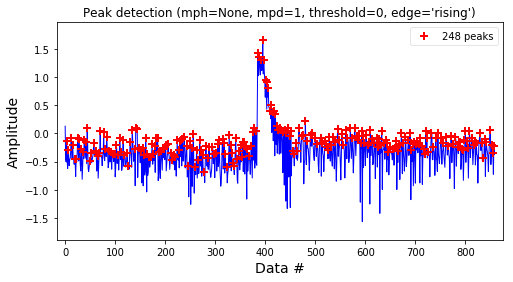

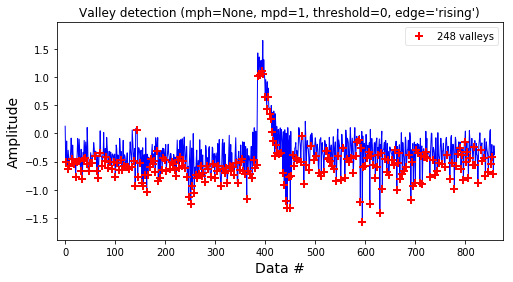

x_pca 0.43524124440085393


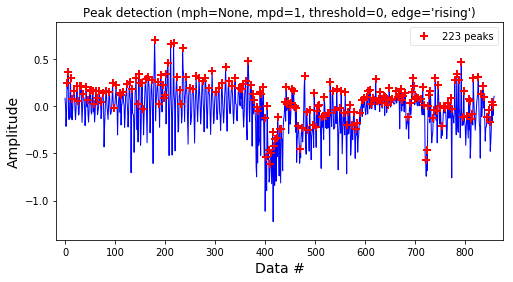

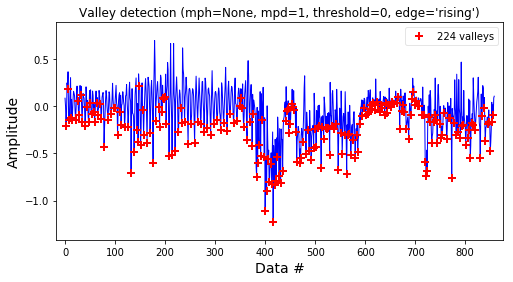

y_pca 0.33397747798007704


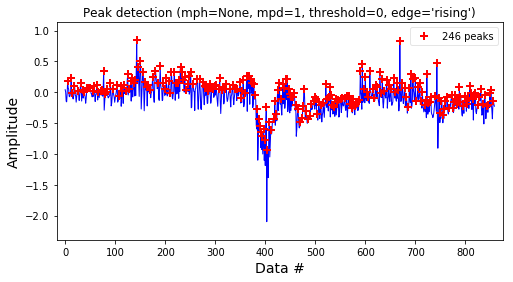

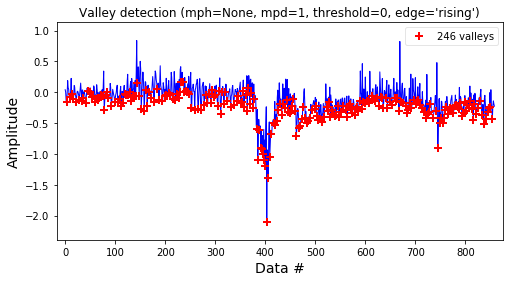

z_pca 0.25327317332942506
1002


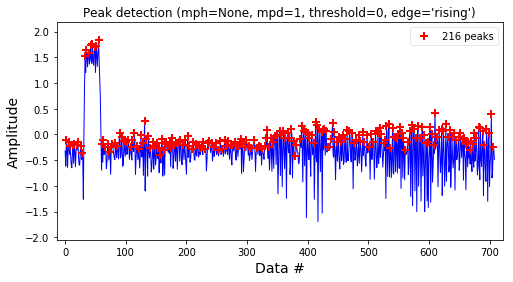

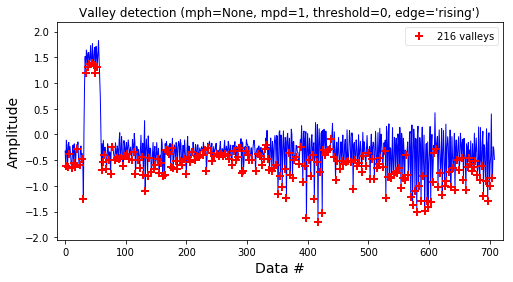

x_pca 0.5694499055178321


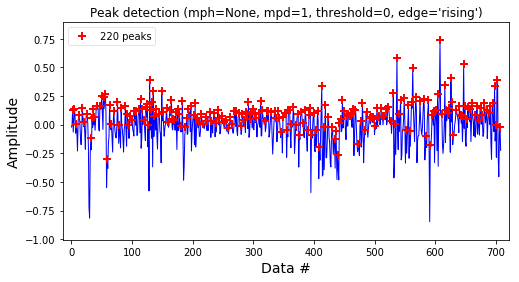

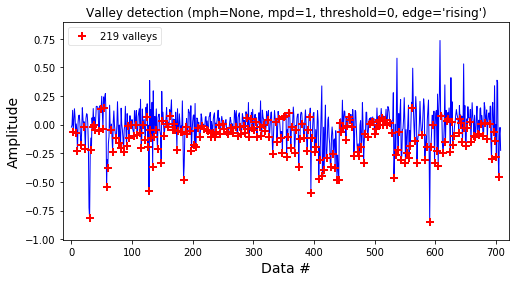

y_pca 0.22879972517947395


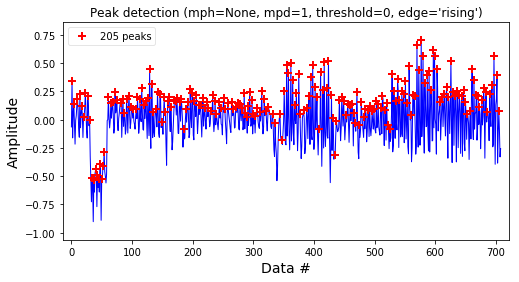

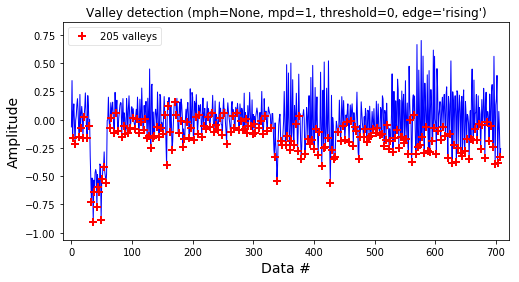

z_pca 0.3366229381916993
1003


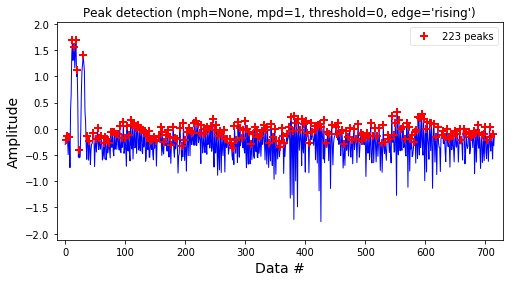

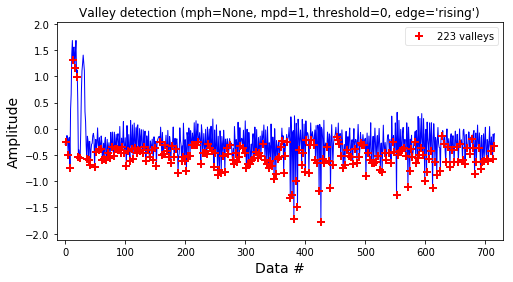

x_pca 0.5162934142639498


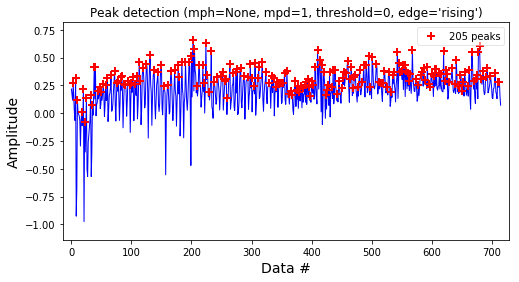

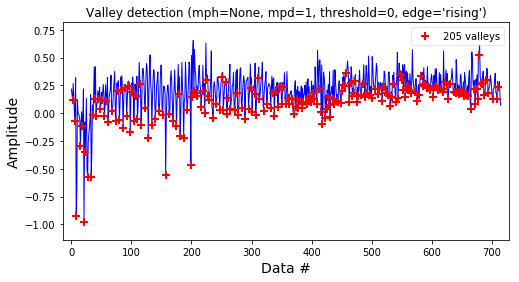

y_pca 0.23749617184147903


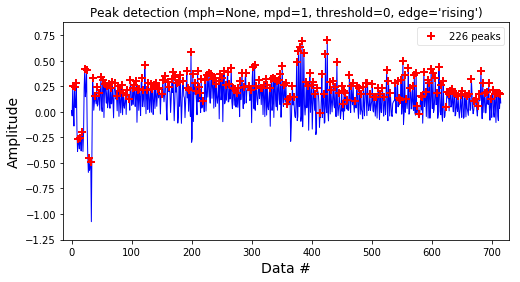

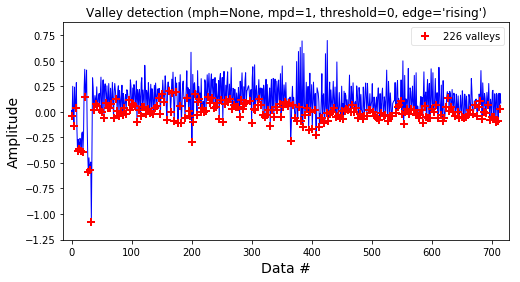

z_pca 0.27230195803012885
1004


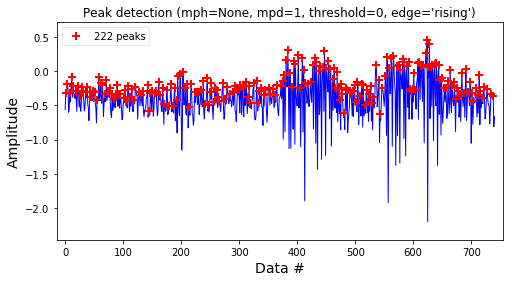

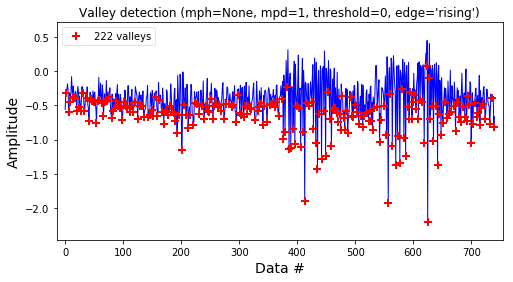

x_pca 0.457920314008278


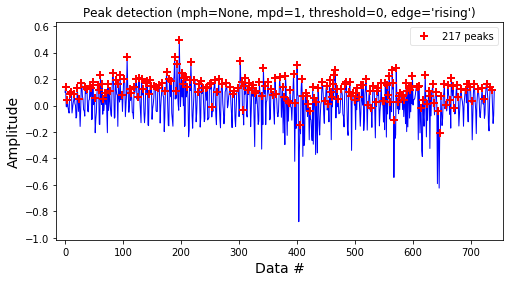

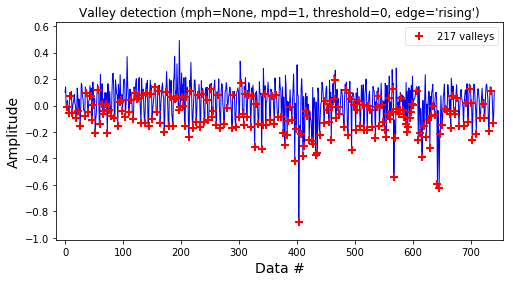

y_pca 0.21551502910549597


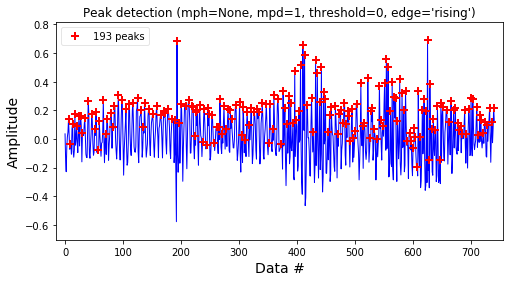

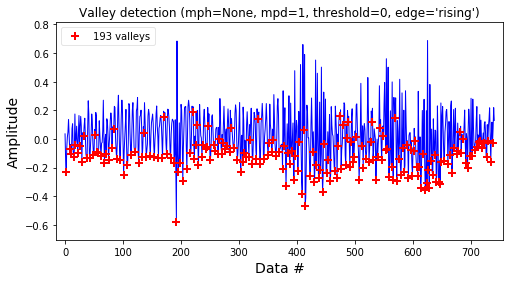

z_pca 0.31132442910492325
1005


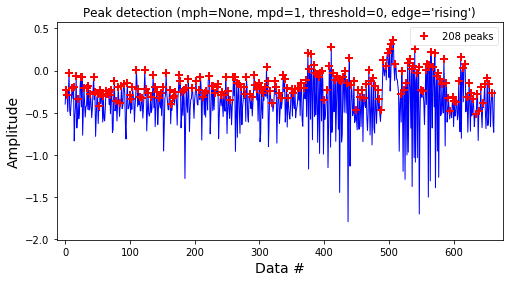

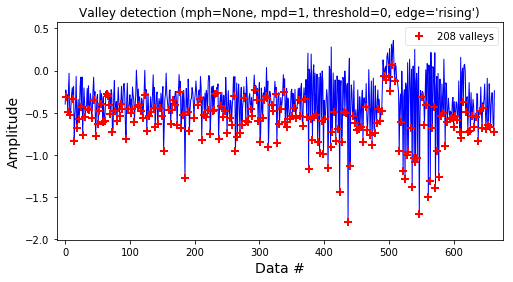

x_pca 0.4673524477872769


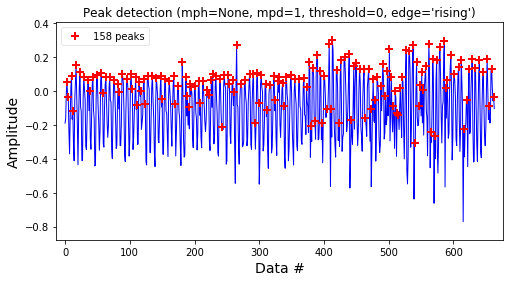

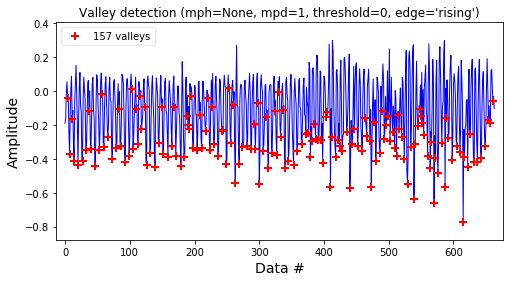

y_pca 0.3516058521327792


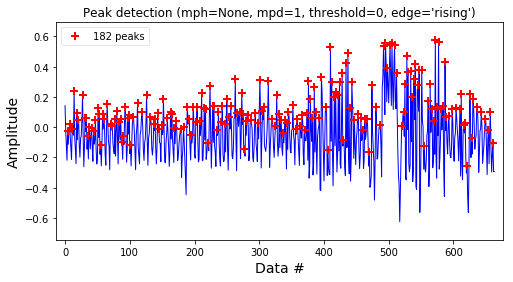

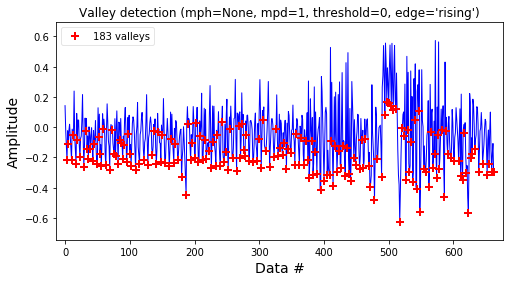

z_pca 0.31443556487487523
1006


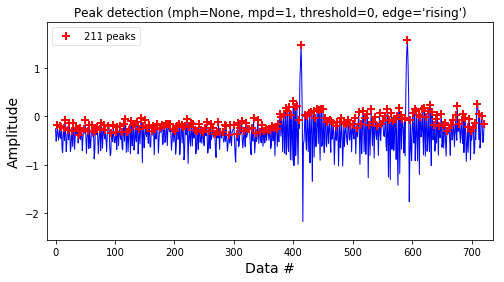

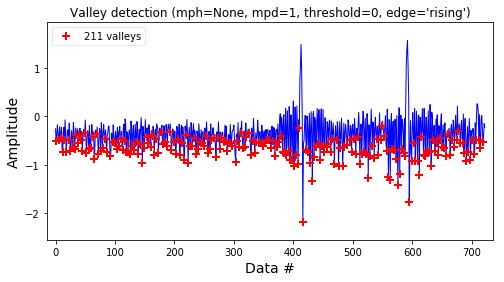

x_pca 0.5699292286631257


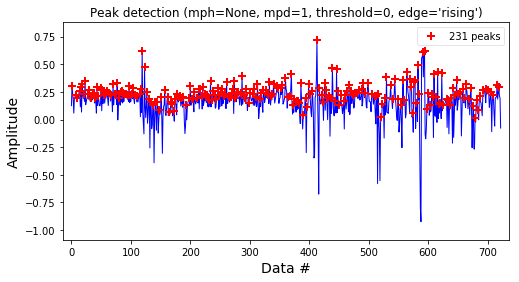

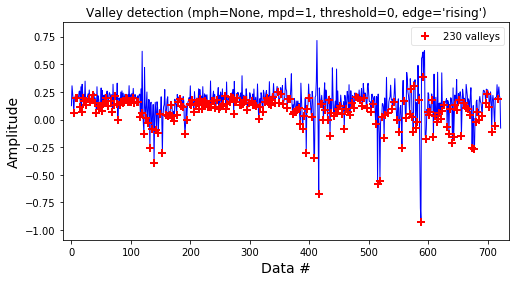

y_pca 0.17853844846423084


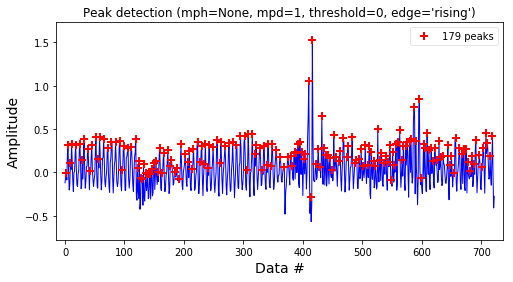

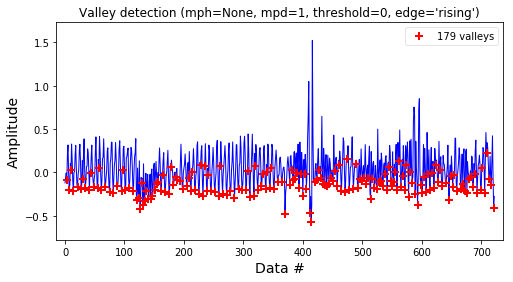

z_pca 0.37645659409854826
1007


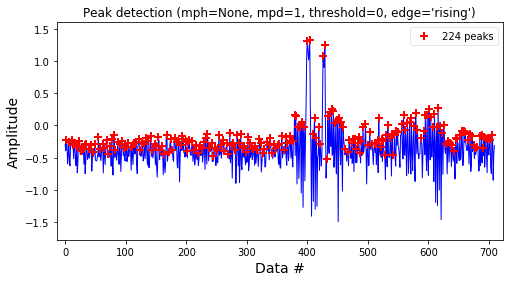

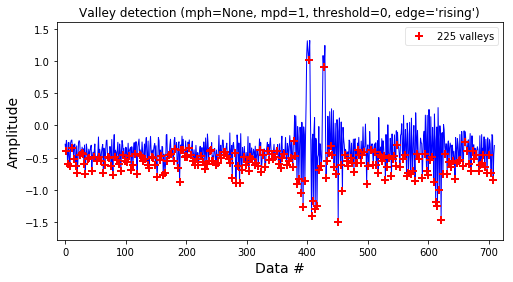

x_pca 0.41173113622663465


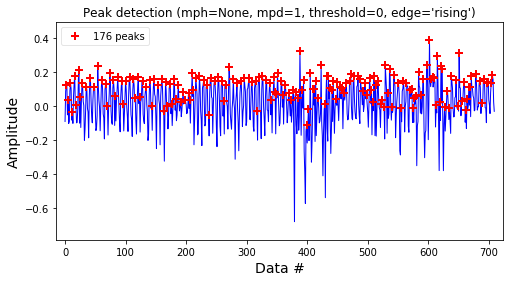

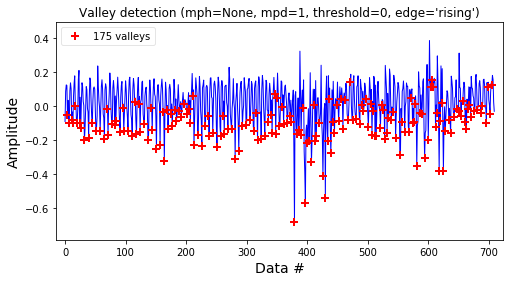

y_pca 0.22491324356154532


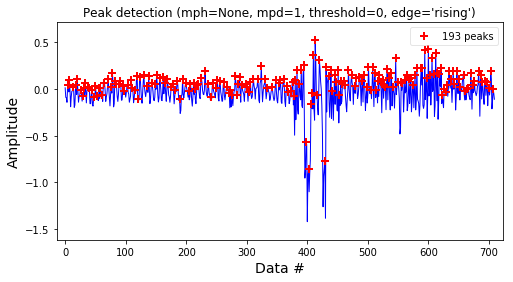

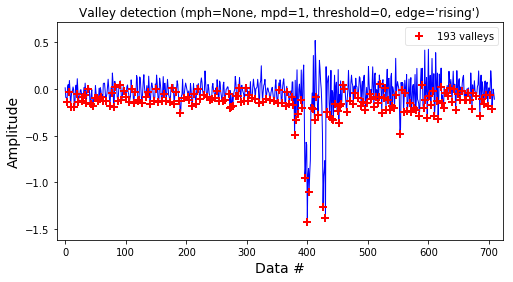

z_pca 0.2323287640225497
1008


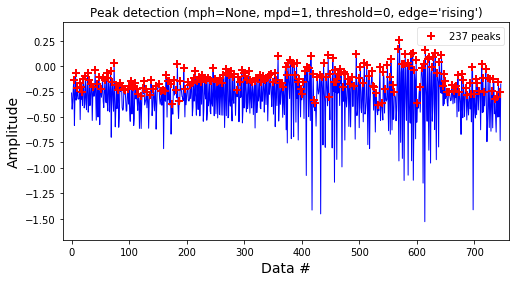

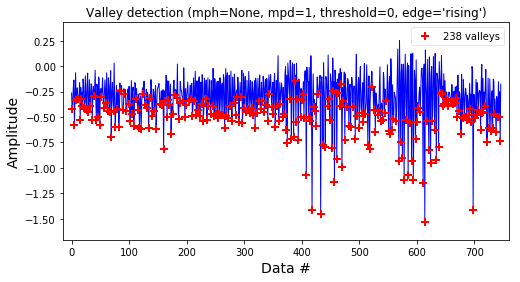

x_pca 0.4013383641204816


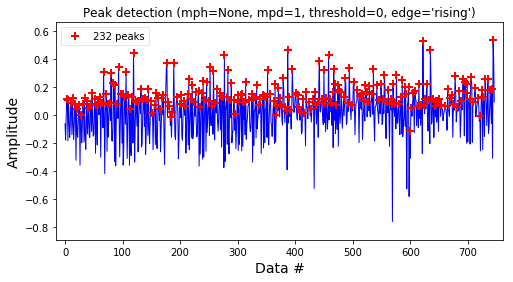

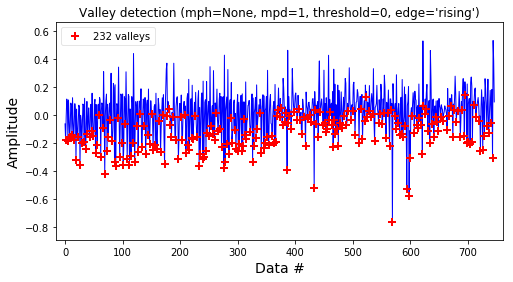

y_pca 0.2883296821090217


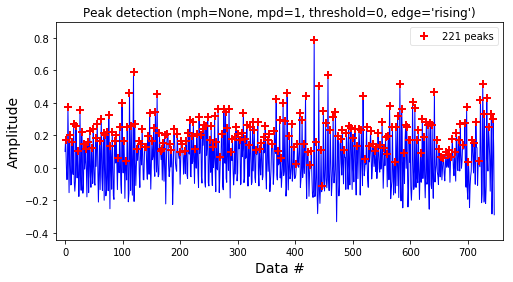

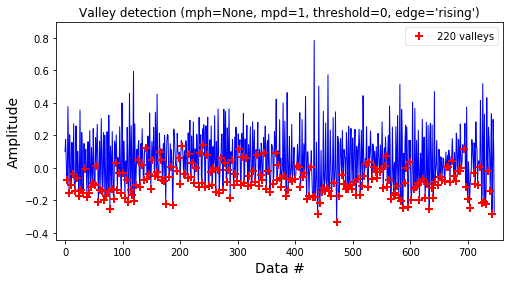

z_pca 0.30752081926310787
1009


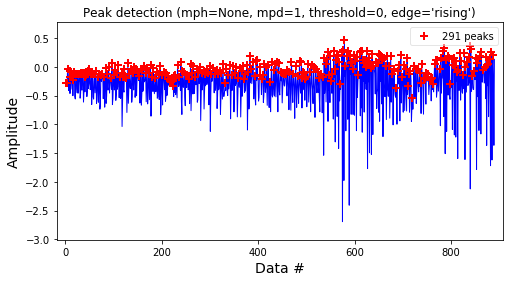

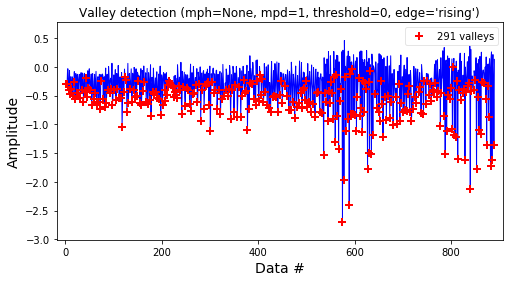

x_pca 0.5984081929411843


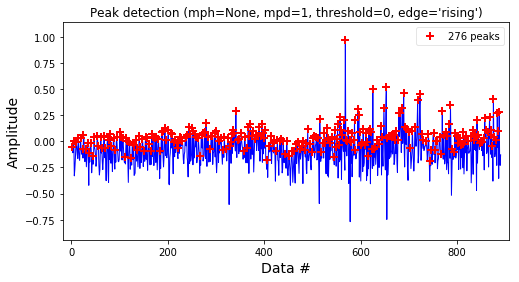

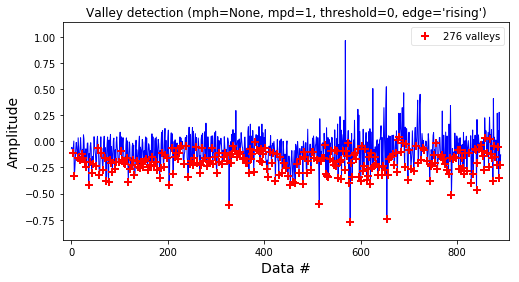

y_pca 0.2526513541729734


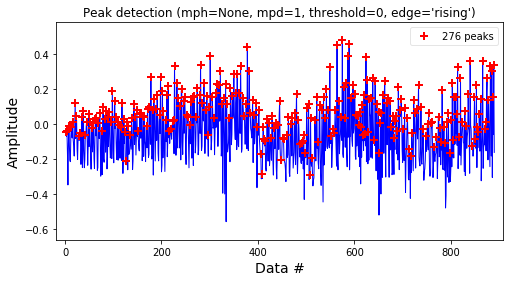

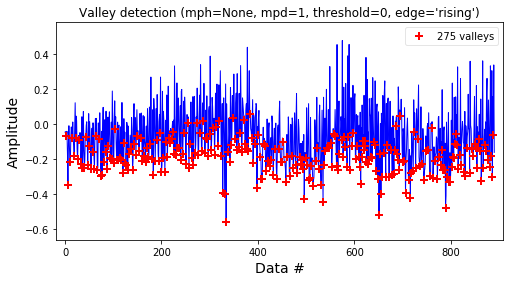

z_pca 0.26436482383862536
1010


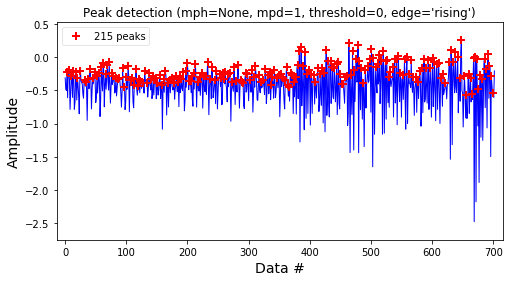

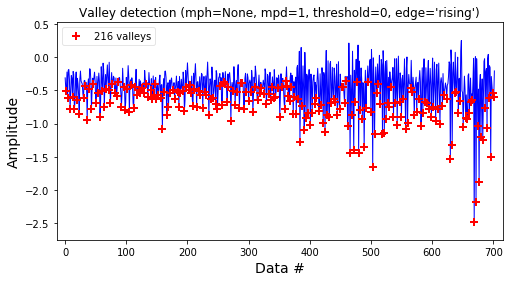

x_pca 0.5167381338328809


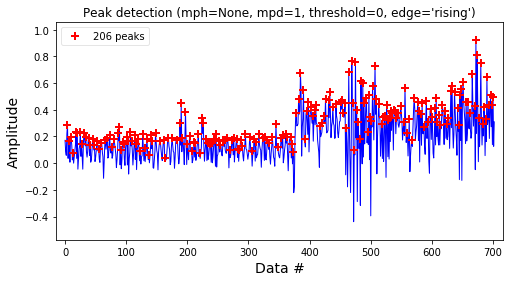

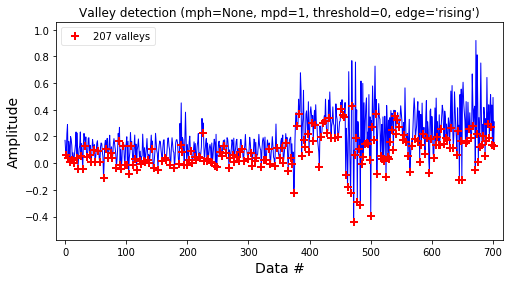

y_pca 0.2306283387798517


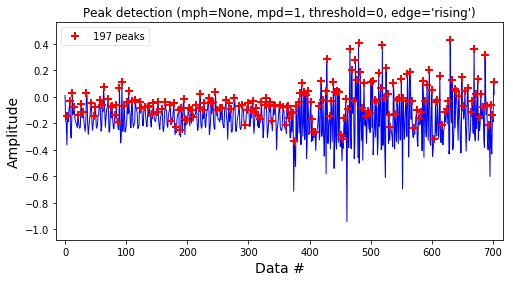

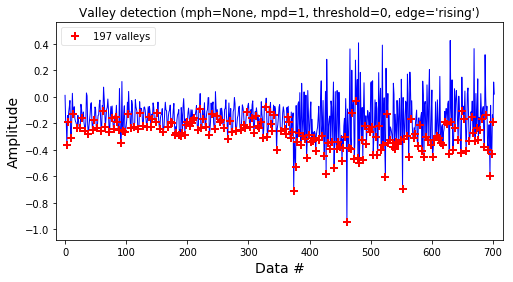

z_pca 0.25597876702810496
1011


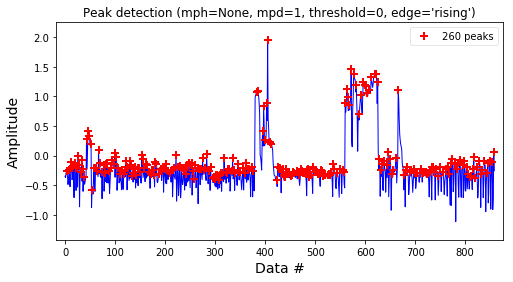

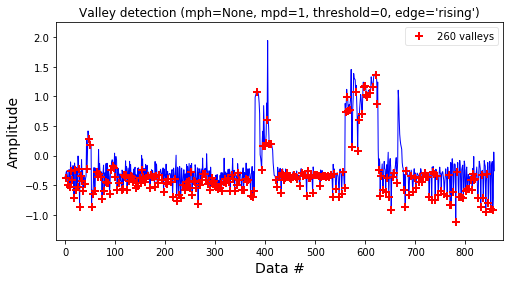

x_pca 0.2818018789037378


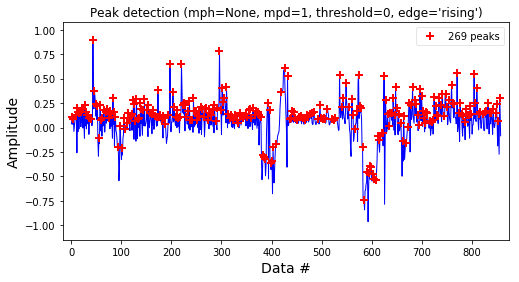

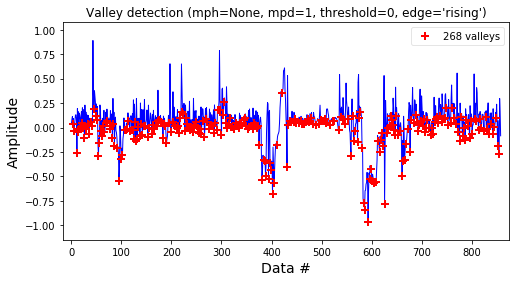

y_pca 0.18722291012924377


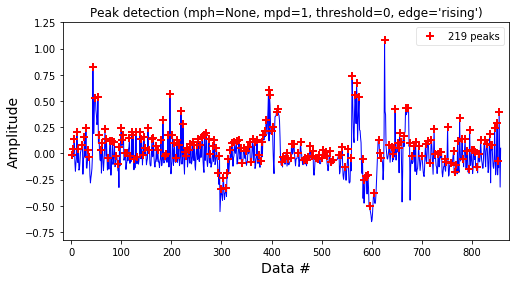

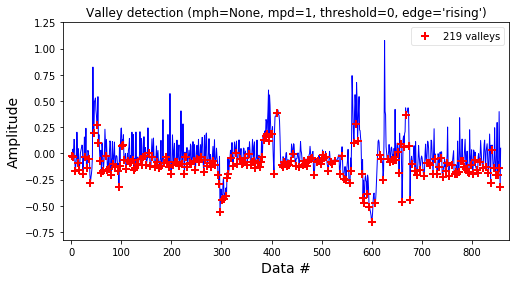

z_pca 0.1988632823553081
1012


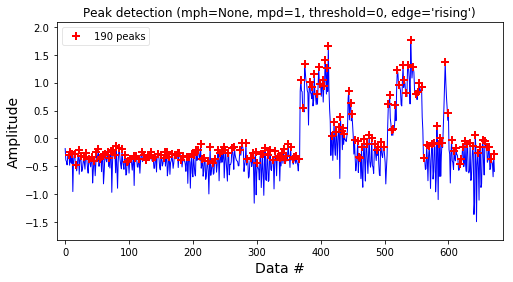

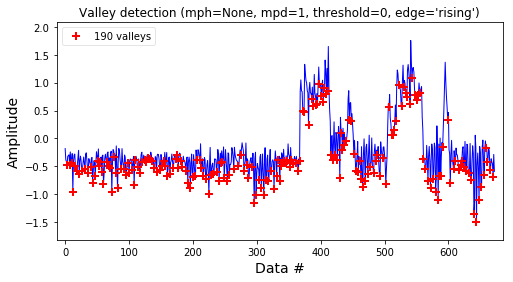

x_pca 0.3866764046367517


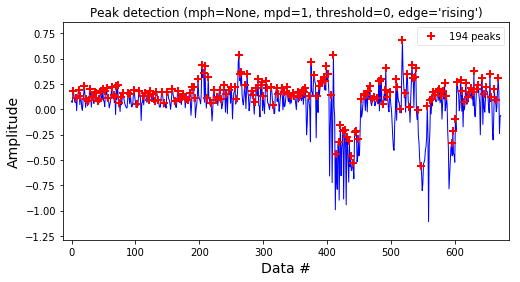

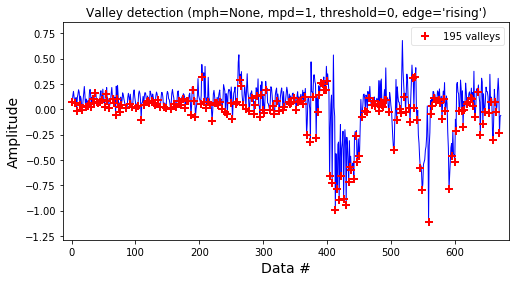

y_pca 0.1992627731046922


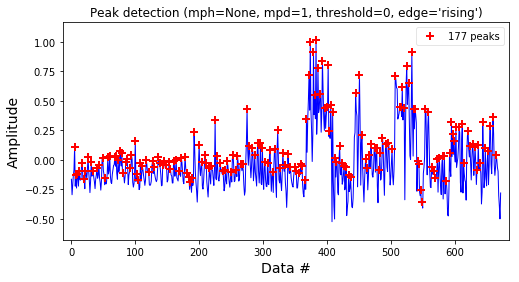

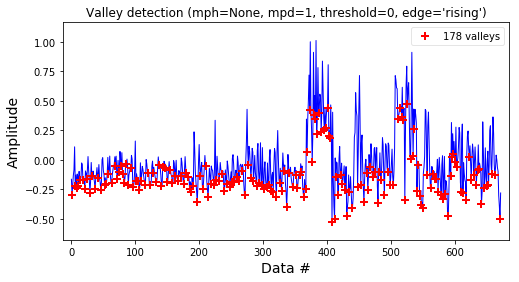

z_pca 0.2537997399691459
2002


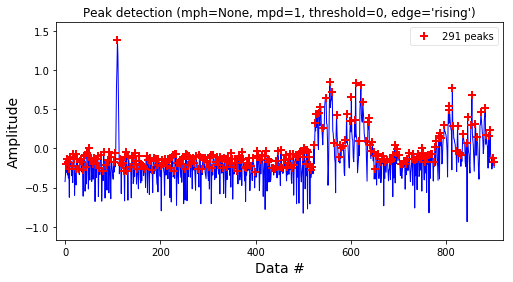

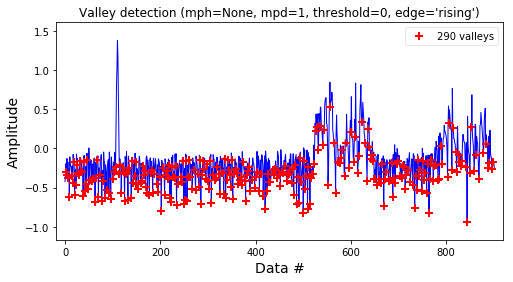

x_pca 0.28365247025757007


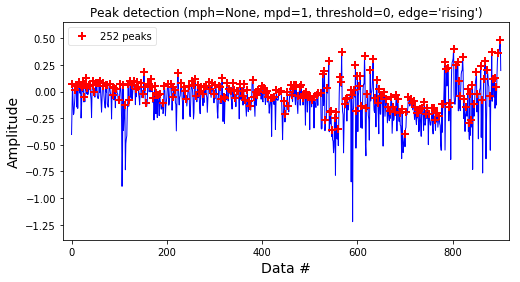

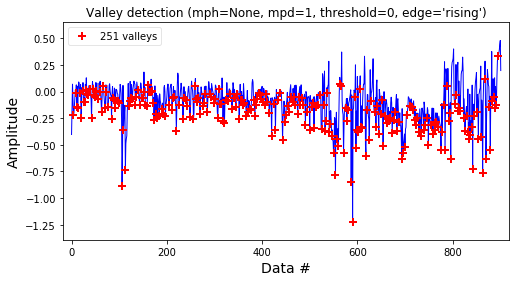

y_pca 0.2094637801644915


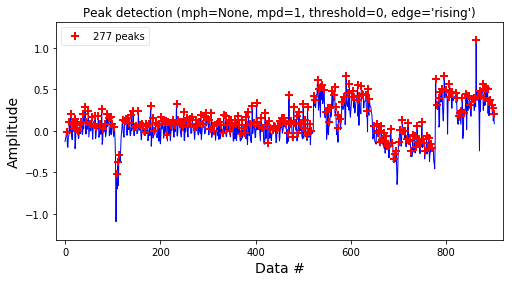

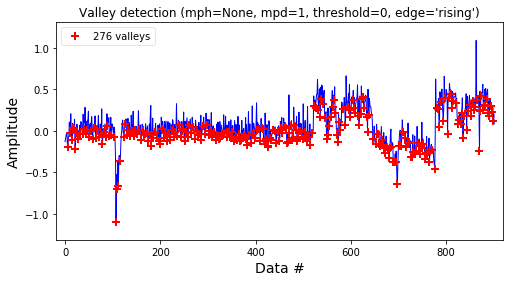

z_pca 0.17529495216371796


In [498]:
cols = ['x_pca', 'y_pca', 'z_pca']
all_avg_diff_1 = [[],[],[]]

for subj_i in all_subjects:
    df_walk_i = df_walk_1[df_walk_1['id']==subj_i]
    df_walk_i = df_walk_i.reset_index(drop=True)
    
    print(subj_i)
    
    for i in range(len(cols)):
        c = cols[i]
        
        peak_idx = detect_peaks(df_walk_i[c], show=True)    
        valley_idx = detect_peaks(df_walk_i[c], valley=True, show=True)

        peak_point = [df_walk_i.loc[i, c] for i in peak_idx]    
        valley_point = [df_walk_i.loc[i, c] for i in valley_idx]

        min_length = min(len(peak_idx), len(valley_idx))

        diff_peak_valley = [np.abs(peak_point[i] - valley_point[i]) for i in range(min_length)]
        avg_diff_pv = np.mean(diff_peak_valley)

#         print(diff_peak_valley)
        print(c, avg_diff_pv)
        
        all_avg_diff_1[i].append(avg_diff_pv)
        
all_avg_diff_1 = np.array(all_avg_diff_1)

1001


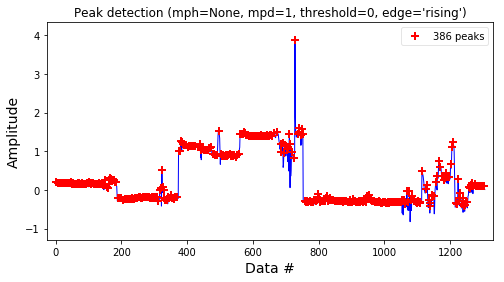

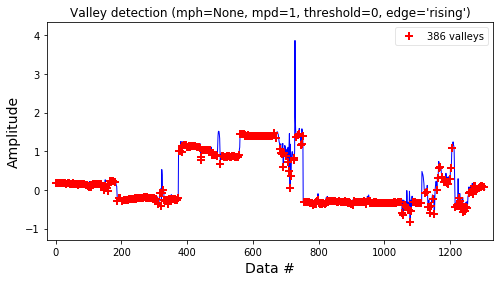

x_pca 0.08835206319121822


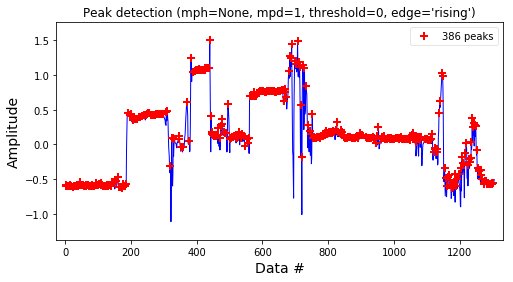

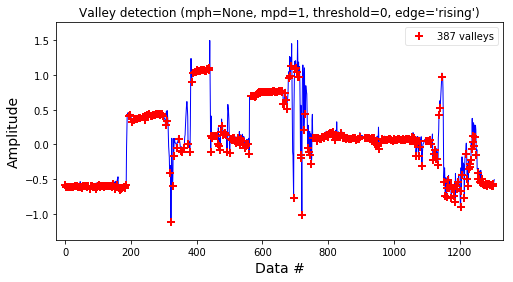

y_pca 0.09809991650942093


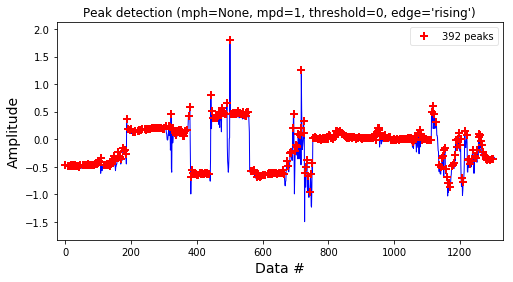

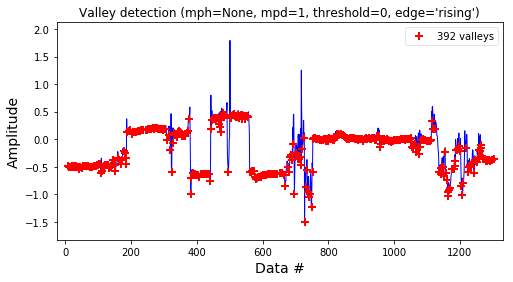

z_pca 0.10085473492265529
1002


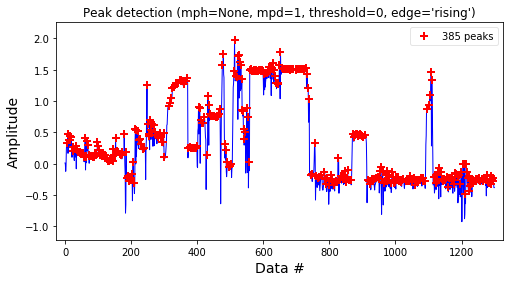

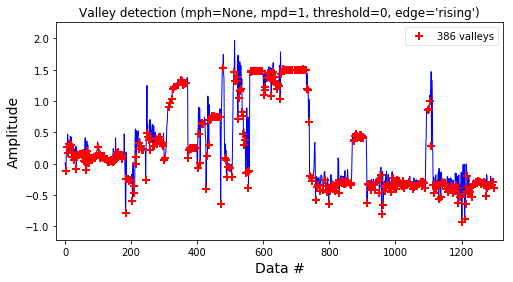

x_pca 0.16014745952424322


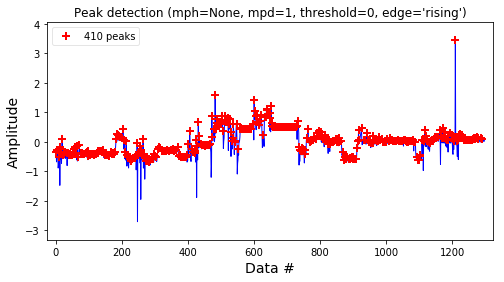

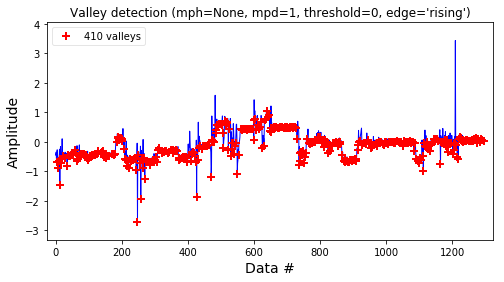

y_pca 0.19501360275885968


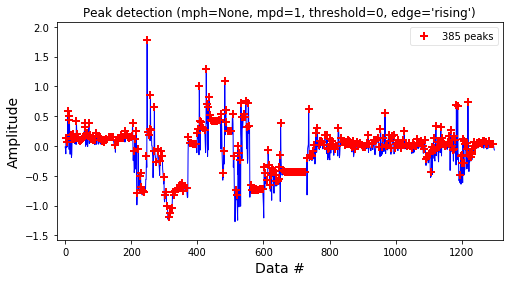

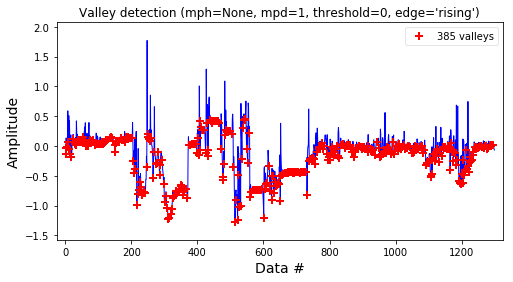

z_pca 0.1788518639196357
1003


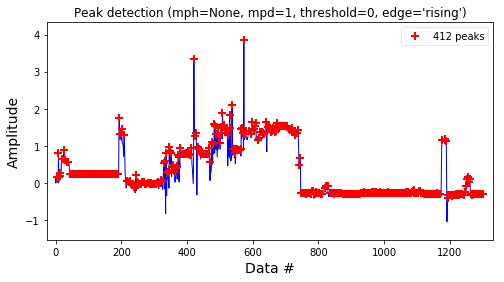

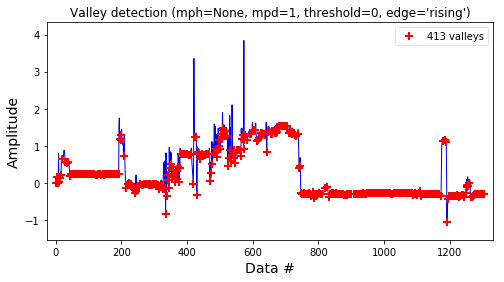

x_pca 0.11869897810713728


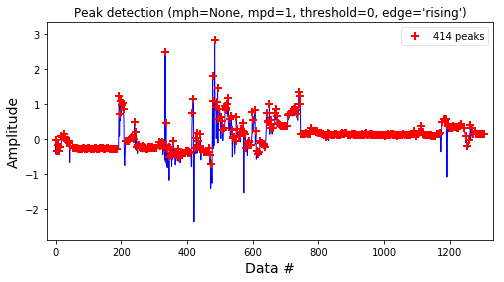

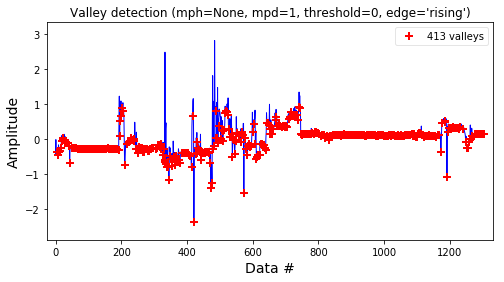

y_pca 0.1540793483263622


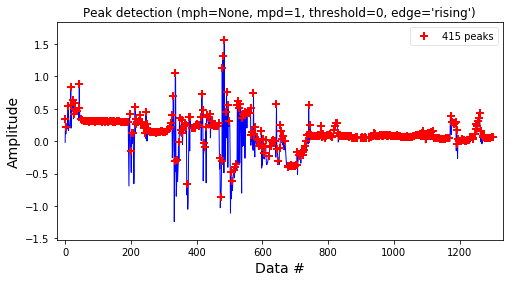

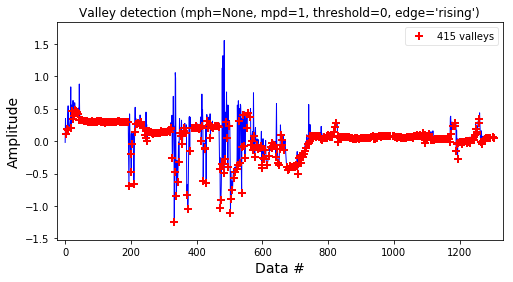

z_pca 0.12462399158906834
1004


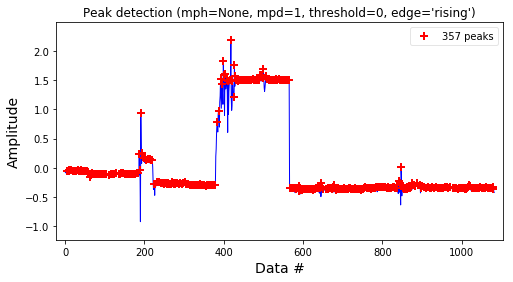

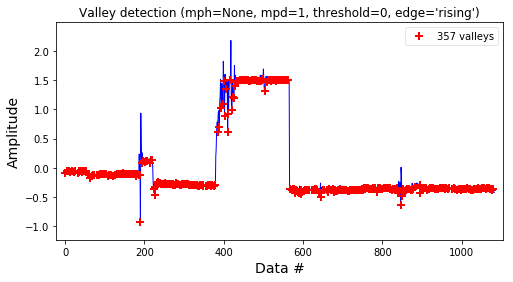

x_pca 0.05103963265012406


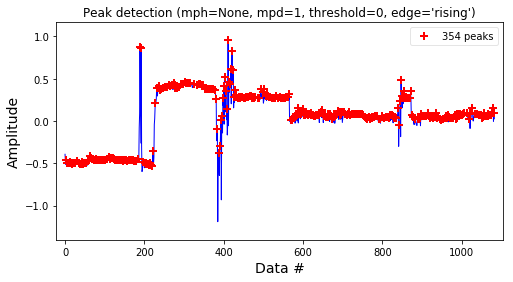

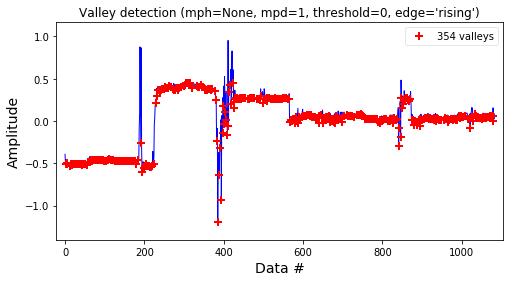

y_pca 0.061121080203208174


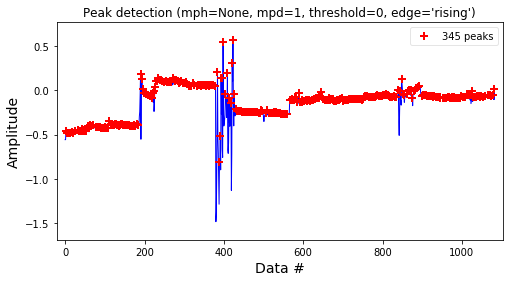

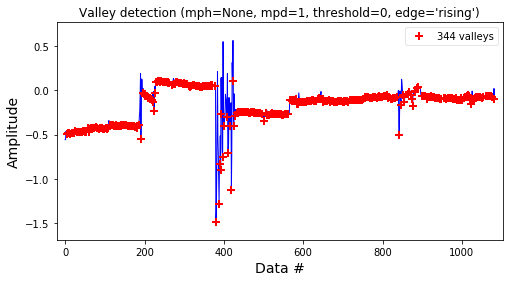

z_pca 0.048697170057352364
1005


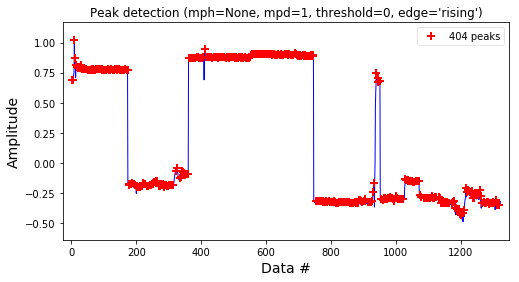

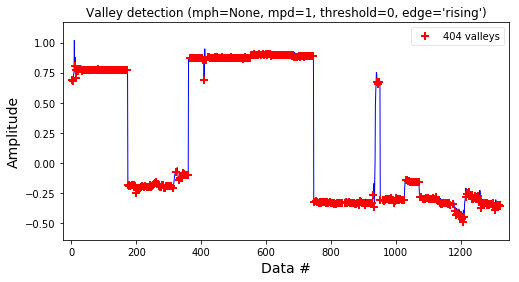

x_pca 0.020902444664213062


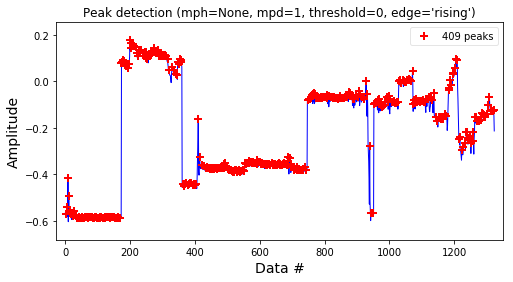

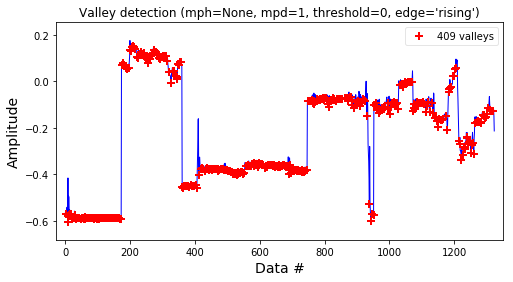

y_pca 0.01939578567013175


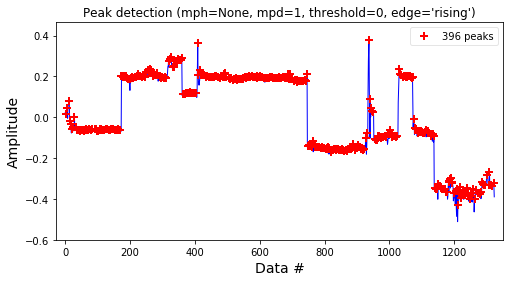

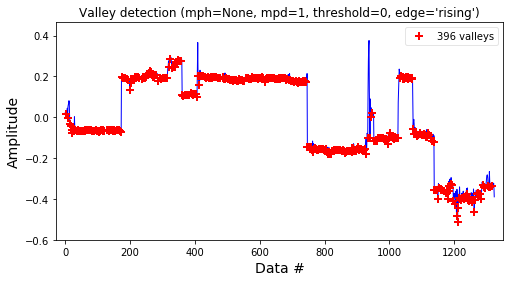

z_pca 0.016240320253902464
1006


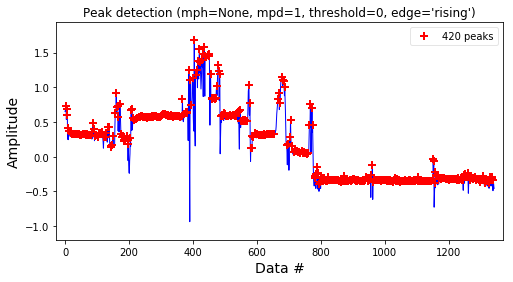

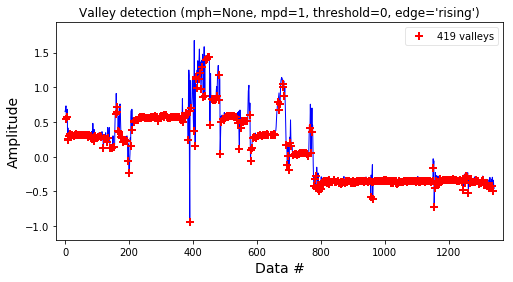

x_pca 0.08263900990700933


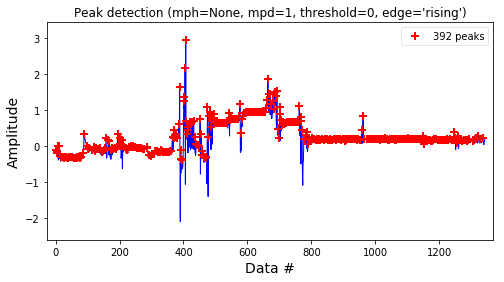

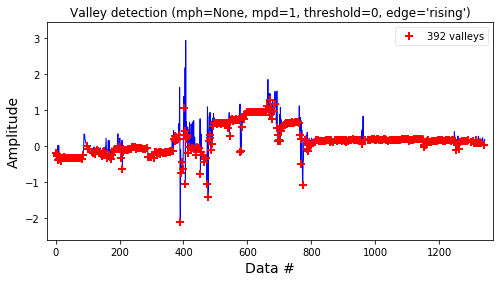

y_pca 0.15231785112897114


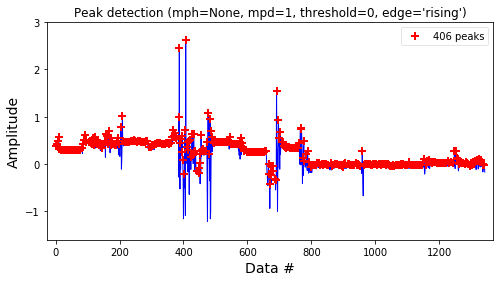

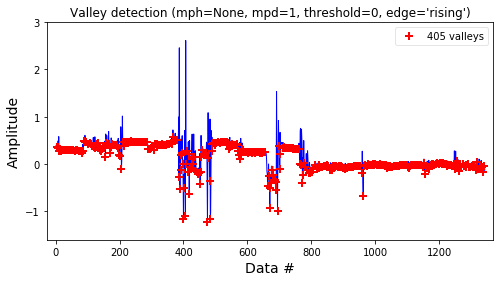

z_pca 0.13451915665669753
1007


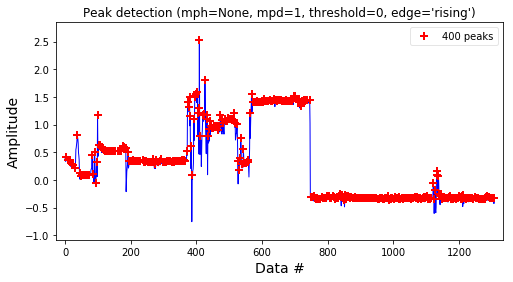

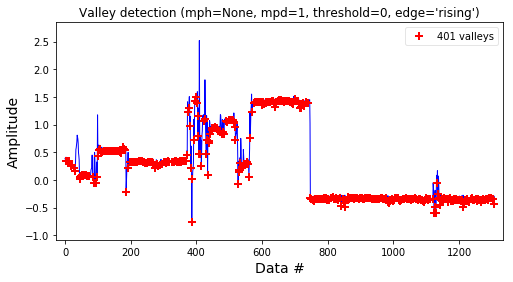

x_pca 0.08190748686028976


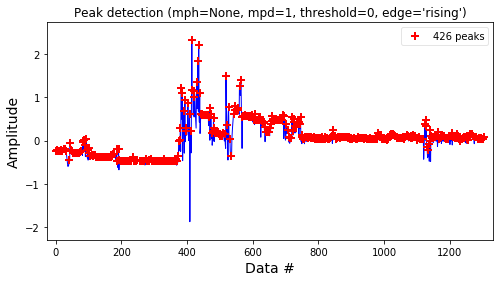

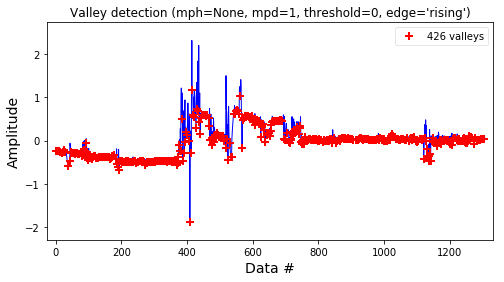

y_pca 0.12333161066015579


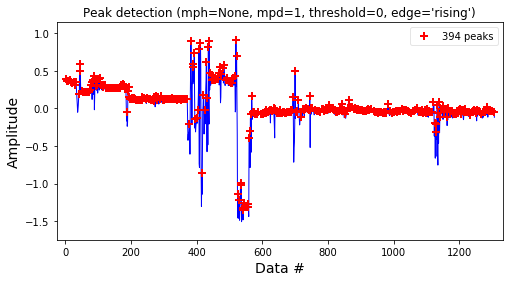

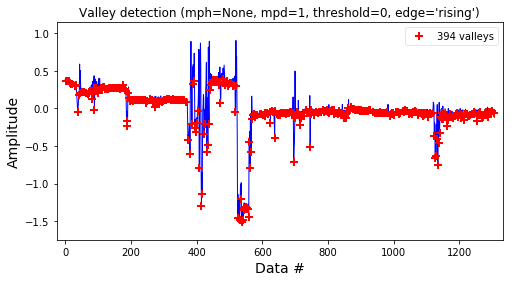

z_pca 0.09664800631631425
1008


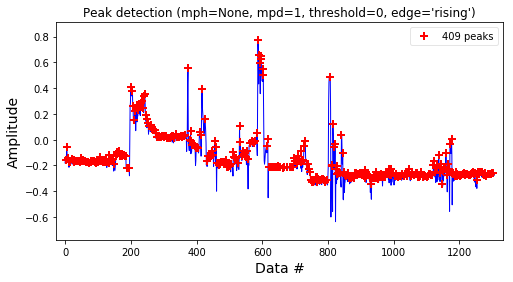

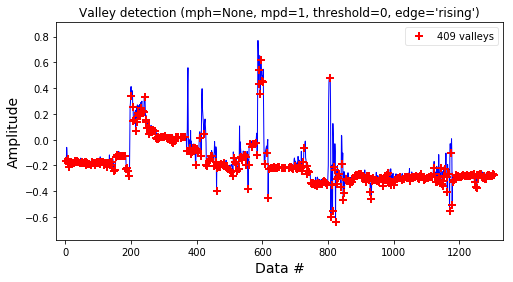

x_pca 0.0531583519988726


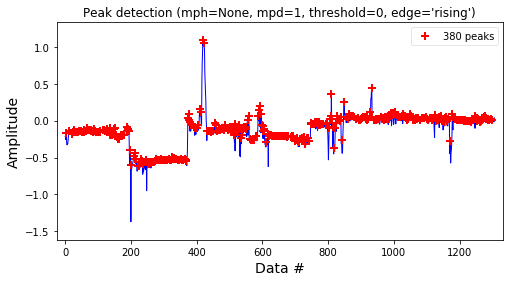

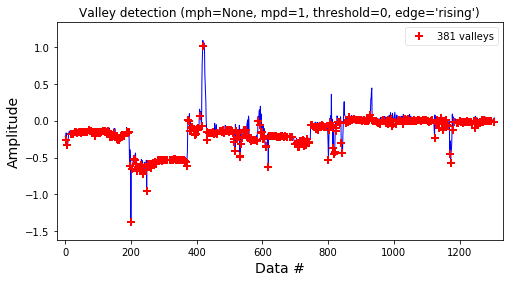

y_pca 0.06399724693154579


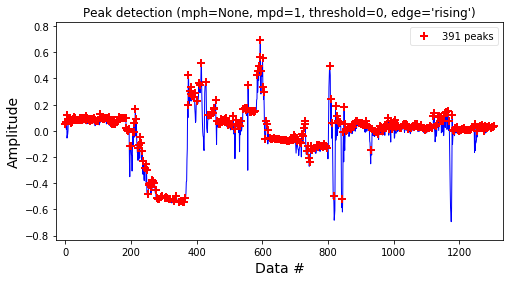

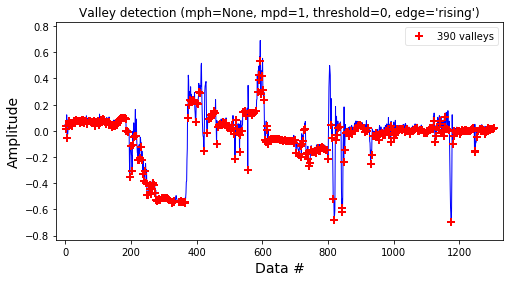

z_pca 0.05778557238823411
1009


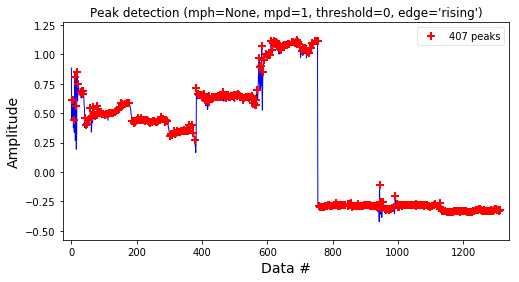

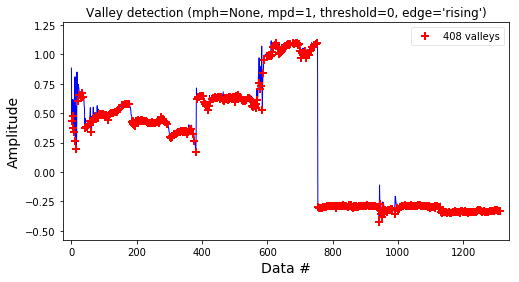

x_pca 0.026214324301868597


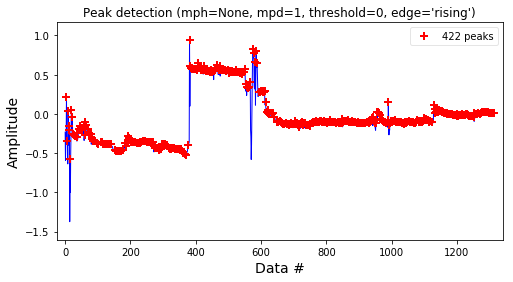

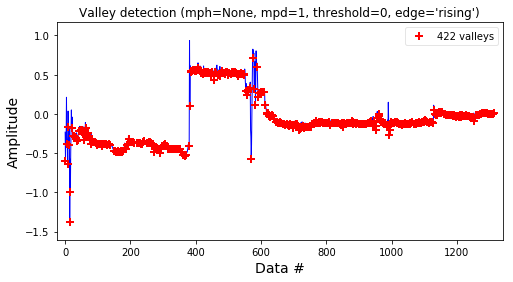

y_pca 0.042750331587932136


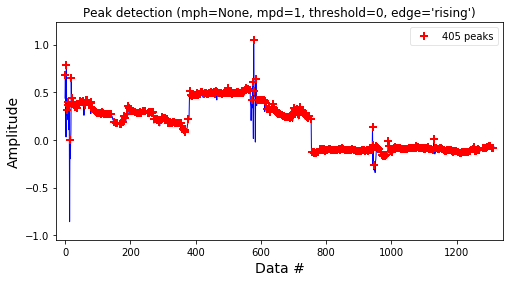

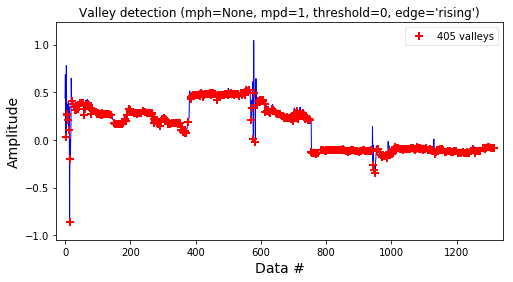

z_pca 0.03250083961440019
1010


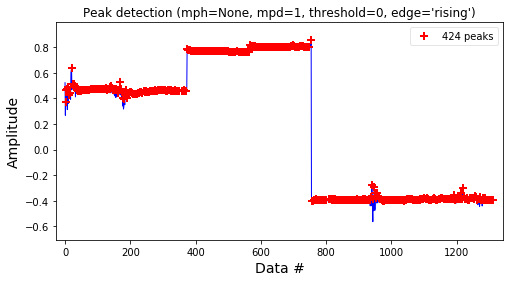

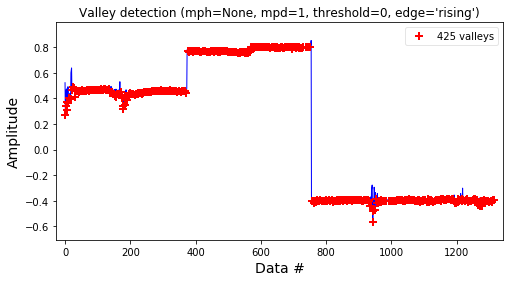

x_pca 0.013935626379874364


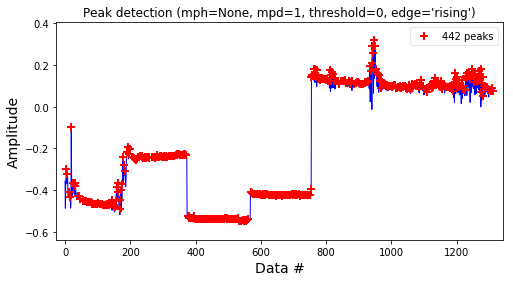

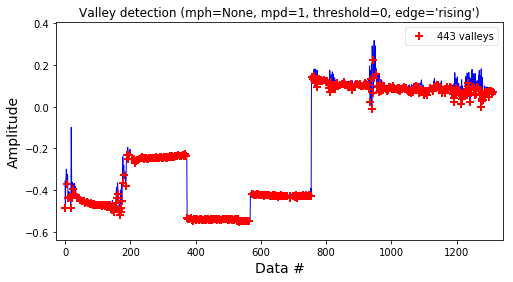

y_pca 0.022609518827218053


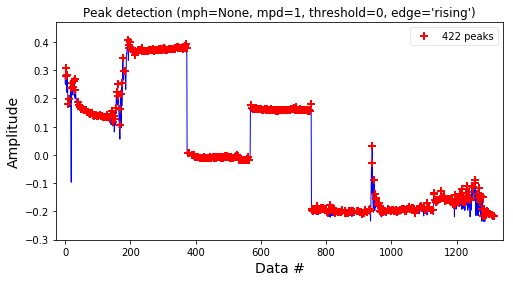

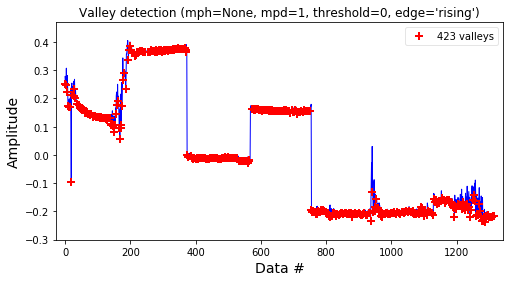

z_pca 0.015690406182559666
1011


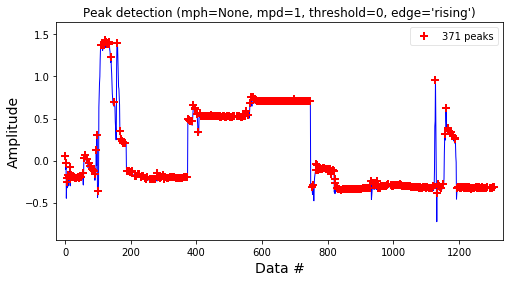

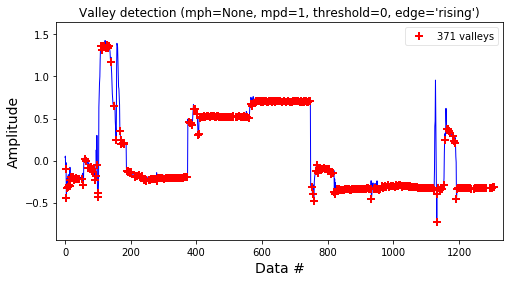

x_pca 0.038945866011787046


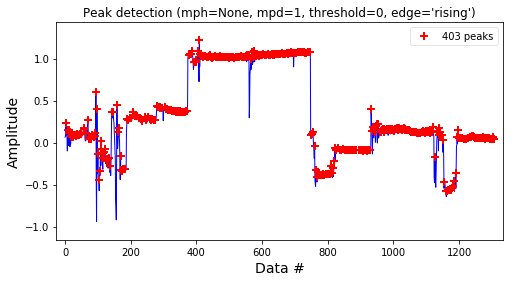

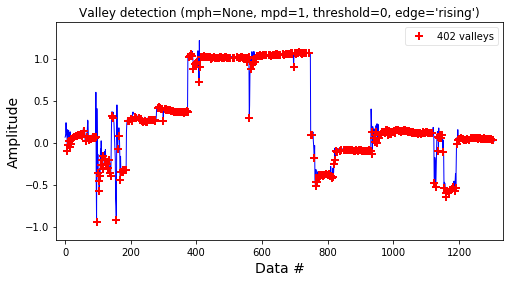

y_pca 0.052899848791484204


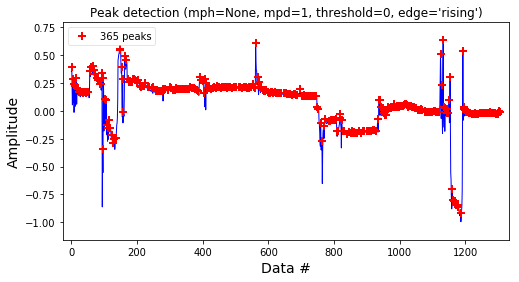

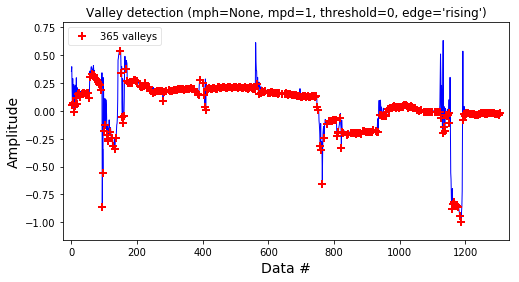

z_pca 0.0469893974721076
1012


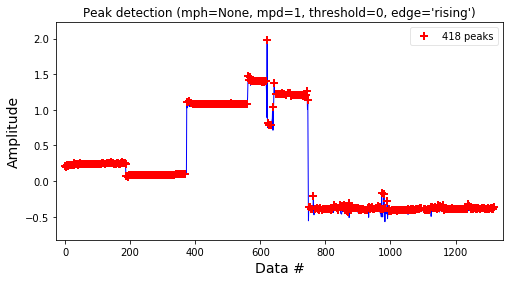

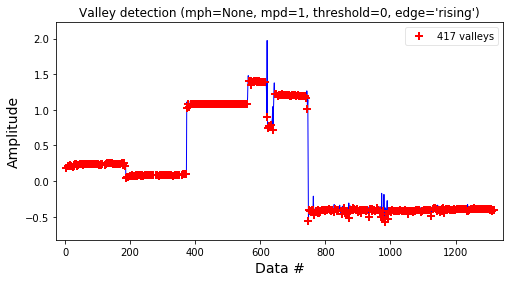

x_pca 0.02822561002487858


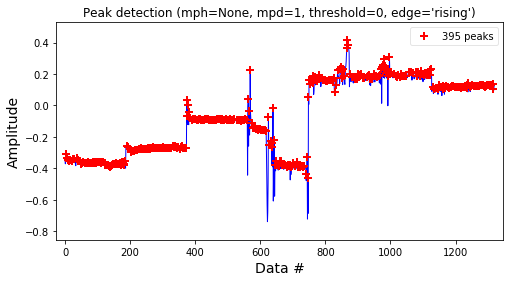

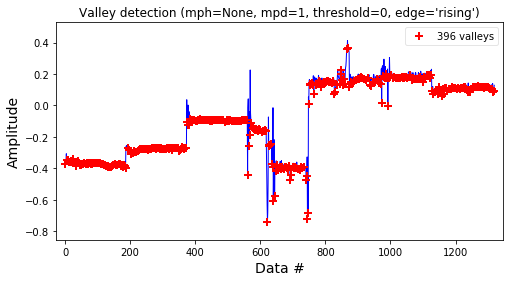

y_pca 0.02831048516829985


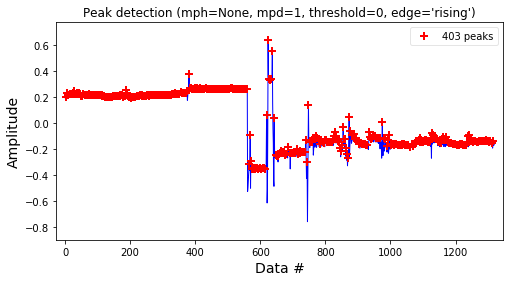

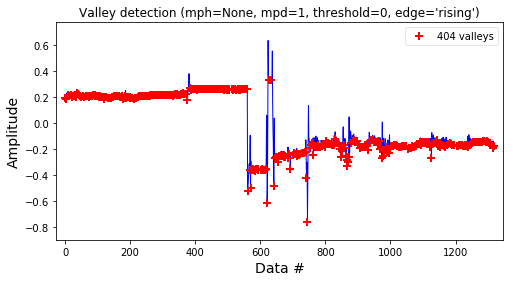

z_pca 0.02925567675149055
2002


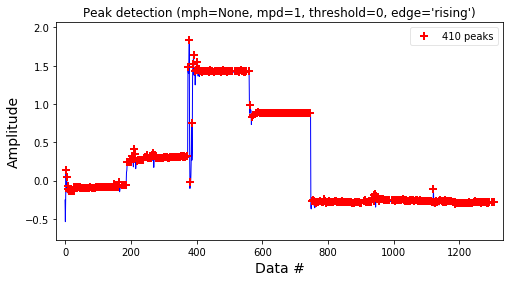

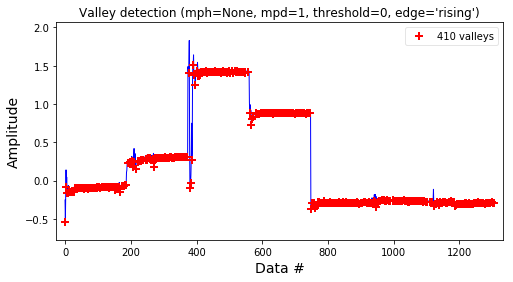

x_pca 0.028135638469178506


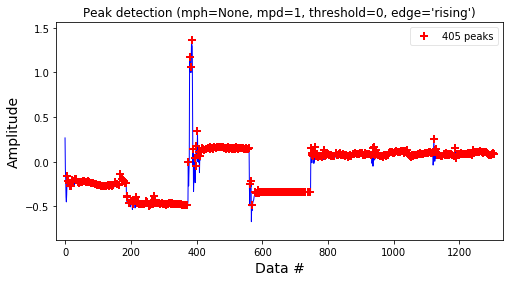

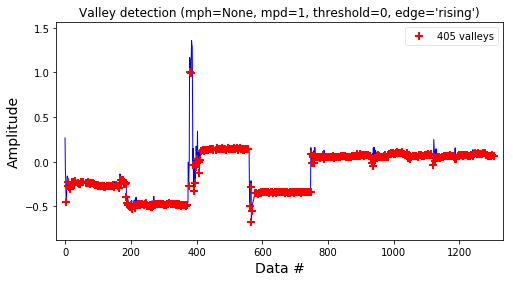

y_pca 0.031614373686668494


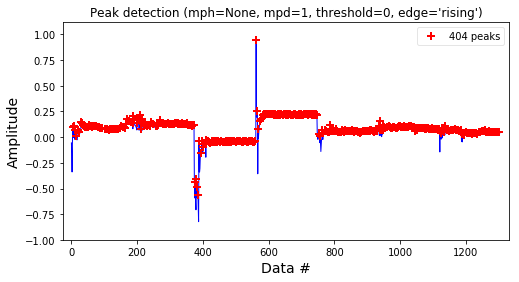

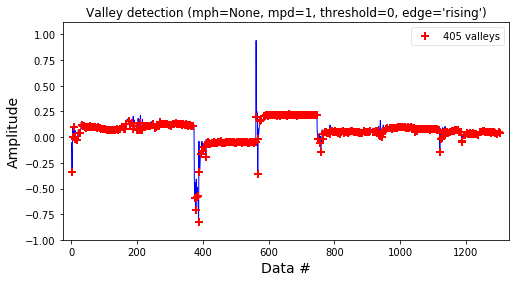

z_pca 0.024176750378797754


In [499]:
cols = ['x_pca', 'y_pca', 'z_pca']
all_avg_diff_nw_1 = [[],[],[]]

for subj_i in all_subjects:
    df_nonwalk_i = df_nonwalk_1[df_nonwalk_1['id']==subj_i]
    df_nonwalk_i = df_nonwalk_i.reset_index(drop=True)
    
    print(subj_i)
    
    for i in range(len(cols)):
        c = cols[i]
        
        peak_idx = detect_peaks(df_nonwalk_i[c], show=True)    
        valley_idx = detect_peaks(df_nonwalk_i[c], valley=True, show=True)

        peak_point = [df_nonwalk_i.loc[i, c] for i in peak_idx]    
        valley_point = [df_nonwalk_i.loc[i, c] for i in valley_idx]

        min_length = min(len(peak_idx), len(valley_idx)) - 1

        diff_peak_valley = [np.abs(peak_point[i] - valley_point[i]) for i in range(min_length)]
        avg_diff_pv = np.mean(diff_peak_valley)

    #     print(diff_peak_valley)
        print(c, avg_diff_pv)
        
        all_avg_diff_nw_1[i].append(avg_diff_pv)
        
all_avg_diff_nw_1 = np.array(all_avg_diff_nw_1)

In [505]:
aad_t_1 = all_avg_diff_1.transpose()

print('walking for normal people')
for i in range(len(aad_t_1)):
    print(all_subjects[i], aad_t_1[i])
    
aad_t_nw_1 = all_avg_diff_nw_1.transpose()

print()
print('non-walking for normal people')
for i in range(len(aad_t_nw_1)):
    print(all_subjects[i], aad_t_nw_1[i])

walking for normal people
1001 [0.44 0.33 0.25]
1002 [0.57 0.23 0.34]
1003 [0.52 0.24 0.27]
1004 [0.46 0.22 0.31]
1005 [0.47 0.35 0.31]
1006 [0.57 0.18 0.38]
1007 [0.41 0.22 0.23]
1008 [0.4  0.29 0.31]
1009 [0.6  0.25 0.26]
1010 [0.52 0.23 0.26]
1011 [0.28 0.19 0.2 ]
1012 [0.39 0.2  0.25]
2002 [0.28 0.21 0.18]

non-walking for normal people
1001 [0.09 0.1  0.1 ]
1002 [0.16 0.2  0.18]
1003 [0.12 0.15 0.12]
1004 [0.05 0.06 0.05]
1005 [0.02 0.02 0.02]
1006 [0.08 0.15 0.13]
1007 [0.08 0.12 0.1 ]
1008 [0.05 0.06 0.06]
1009 [0.03 0.04 0.03]
1010 [0.01 0.02 0.02]
1011 [0.04 0.05 0.05]
1012 [0.03 0.03 0.03]
2002 [0.03 0.03 0.02]


In [539]:
three_sec = 20   # 3 sec/0.16 sec = 18.75 time point
one_sec = 6      # 1 sec/0.16 sec = 6.25 time point

cols = ['x_pca', 'y_pca', 'z_pca']
threshold_1 = [0.28, 0.18, 0.18]

exceed_thres_1 = [[],[],[]]

for cl in range(len(cols)):
    c = cols[cl]
    
    for i in range(0, len(df_walk_1)-three_sec, one_sec):
        df_walk_i = [df_walk_1.loc[j, c] for j in range(i,i+three_sec)]
        
        peak_idx = detect_peaks(df_walk_i)    
        valley_idx = detect_peaks(df_walk_i, valley=True)

        peak_point = [df_walk_i[j] for j in peak_idx]    
        valley_point = [df_walk_i[j] for j in valley_idx]

        min_length = min(len(peak_idx), len(valley_idx))

        diff_peak_valley = [np.abs(peak_point[i] - valley_point[i]) for i in range(min_length)]
        diff_peak_valley = np.array(diff_peak_valley)
        
        exceed = len(diff_peak_valley[diff_peak_valley>=threshold_1[cl]])
        exceed_thres_1[cl].append(exceed)

In [540]:
three_sec = 20   # 3 sec/0.16 sec = 18.75 time point
one_sec = 6      # 1 sec/0.16 sec = 6.25 time point

cols = ['x_pca', 'y_pca', 'z_pca']
threshold_1 = [0.28, 0.18, 0.18]

exceed_thres_nw_1 = [[],[],[]]

for cl in range(len(cols)):
    c = cols[cl]
    
    for i in range(0, len(df_nonwalk_1)-three_sec, one_sec):
        df_nonwalk_i = [df_nonwalk_1.loc[j, c] for j in range(i,i+three_sec)]
        
        peak_idx = detect_peaks(df_nonwalk_i)    
        valley_idx = detect_peaks(df_nonwalk_i, valley=True)

        peak_point = [df_nonwalk_i[j] for j in peak_idx]    
        valley_point = [df_nonwalk_i[j] for j in valley_idx]

        min_length = min(len(peak_idx), len(valley_idx))

        diff_peak_valley = [np.abs(peak_point[i] - valley_point[i]) for i in range(min_length)]
        diff_peak_valley = np.array(diff_peak_valley)
        
        exceed = len(diff_peak_valley[diff_peak_valley>=threshold_1[cl]])
        exceed_thres_nw_1[cl].append(exceed)

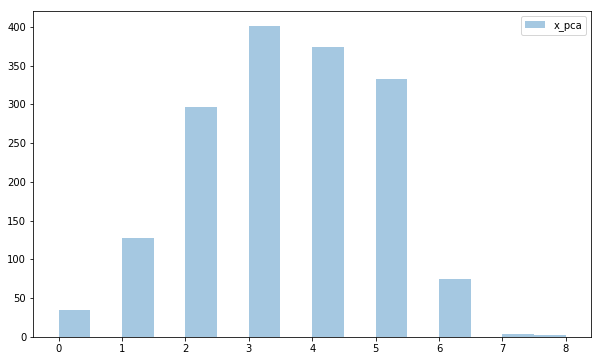

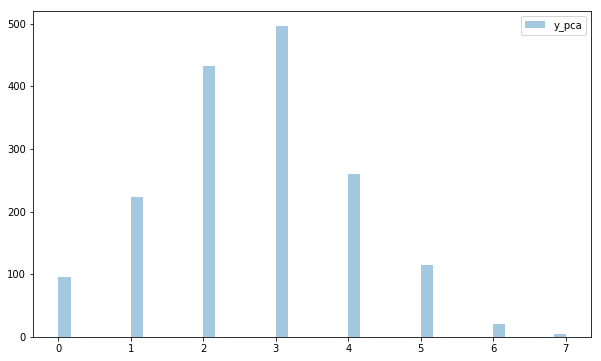

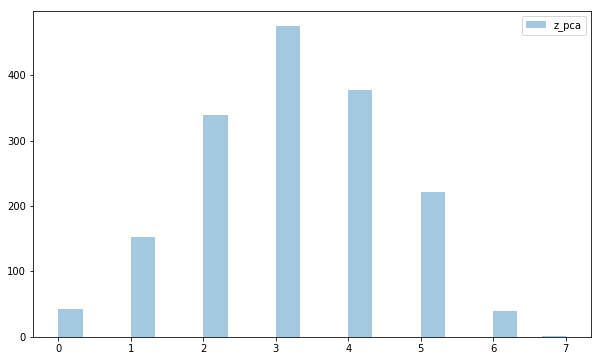

In [542]:
for i in range(3):
    f, axis = plt.subplots(figsize=(10,6))
    ax = sns.distplot(exceed_thres_1[i], kde=False, ax=axis, label=cols[i])
    ax.legend()

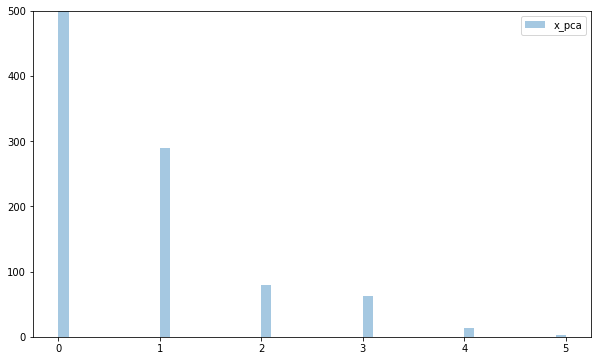

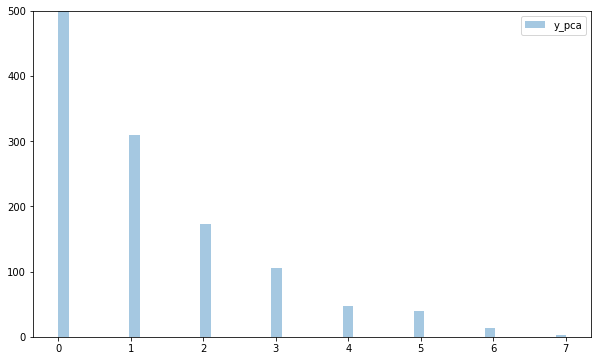

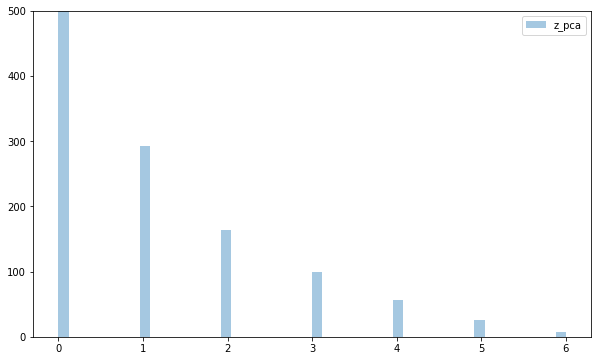

In [546]:
for i in range(3):
    f, axis = plt.subplots(figsize=(10,6))
    ax = sns.distplot(exceed_thres_nw_1[i], kde=False, ax=axis, label=cols[i])
    ax.legend()
    ax.set_ylim(0,500)

# K-Nearest Neighbors

In [20]:
nn_model = nn_classifier(X_train, y_train)
print("Finished training")

Finished training


In [21]:
filename = basepath + 'model/knn_model.pkl'
pickle.dump(nn_model, open(filename, 'wb'))

In [22]:
y_pred = nn_model.predict(X_test)

In [27]:
nn_model_2 = nn_classifier(X_tr, y_tr)
print("Finished training")

Finished training


In [28]:
y_pred_2 = nn_model_2.predict(X_te)

## Evaluation

In [23]:
%run eval_score.ipynb

In [24]:
LABELS = ['sit','sleep','stand','walk']

0.815778771858479


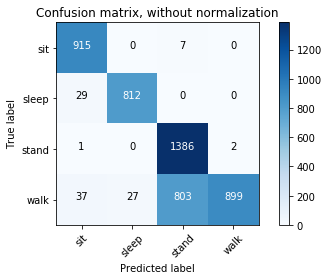

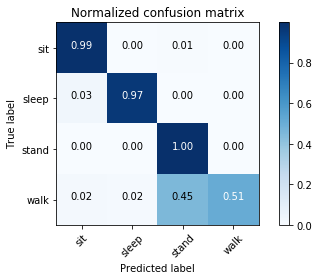

              precision    recall  f1-score   support

         sit       0.93      0.99      0.96       922
       sleep       0.97      0.97      0.97       841
       stand       0.63      1.00      0.77      1389
        walk       1.00      0.51      0.67      1766

   micro avg       0.82      0.82      0.82      4918
   macro avg       0.88      0.87      0.84      4918
weighted avg       0.88      0.82      0.81      4918



In [25]:
acc = accuracy_score(y_test, y_pred)
print(acc)

show_conf_matrix(y_test, y_pred, LABELS)
show_clf_report(y_test, y_pred, LABELS)

0.8130052092689061


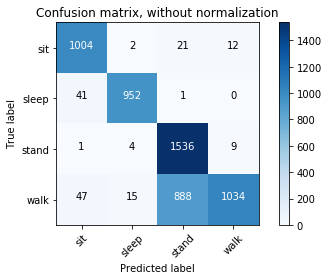

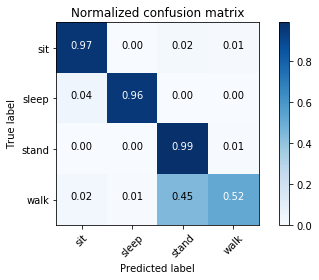

              precision    recall  f1-score   support

         sit       0.92      0.97      0.94      1039
       sleep       0.98      0.96      0.97       994
       stand       0.63      0.99      0.77      1550
        walk       0.98      0.52      0.68      1984

   micro avg       0.81      0.81      0.81      5567
   macro avg       0.88      0.86      0.84      5567
weighted avg       0.87      0.81      0.81      5567



In [29]:
acc = accuracy_score(y_te, y_pred_2)
print(acc)

show_conf_matrix(y_te, y_pred_2, LABELS)
show_clf_report(y_te, y_pred_2, LABELS)

# Walk Algorithm

In [276]:
%run classifier_alg.ipynb

In [284]:
cols = ['x_pca', 'y_pca', 'z_pca']
xyz_pca = df_rpy[cols].to_dict(orient='split')['data']

In [342]:
xyz_pca

[[-0.6434986301287517, 0.6396320954480961, -0.07525068047424084],
 [-0.6557938917308902, 0.596110538739673, -0.05108041955390106],
 [-0.6342921910343922, 0.5317150925825733, -0.05787278088950669],
 [-0.6769890955160223, 0.6222035364968892, -0.11378203418594329],
 [-0.6578875131750141, 0.6023402546409139, -0.06527612813985757],
 [-0.6393785397770148, 0.6153408953797916, -0.058903377019162616],
 [-0.6570576824457518, 0.5847163447542488, -0.04023680243542192],
 [-0.6619747641317123, 0.6013802137520562, -0.053507102669963134],
 [-0.6673315581426694, 0.590096429432256, -0.031113438982461557],
 [-0.6673202742103979, 0.5812394010572207, -0.030797429105008163],
 [-0.642773173901821, 0.5354354816471476, 0.007421925580172399],
 [-0.6782189671363125, 0.5778724249518037, -0.05678586284227197],
 [-0.6839196376571635, 0.5866061759653002, -0.12079669565494466],
 [-0.6748905935244057, 0.5857999050179155, -0.09989568364577457],
 [-0.6657470796846987, 0.5658246165397204, -0.07457490342708756],
 [-0.6705

In [285]:
# classify walking
walk = calc_walk(xyz_pca)
walk_its = intersection_walk(walk)
walk_pred_p = calc_walk_periods(walk_its)

# walk_stairs_exact_p = get_exact_walk_stairs(y_all)
walk_exact_p = get_exact_walk(y_all)
    
walk_pred = binarize_walk_prd(walk_pred_p, y_all)
# walk_stairs_exact = binarize_walk_prd(walk_stairs_exact_p, y_all)
walk_exact = binarize_walk_prd(walk_exact_p, y_all)

## Walk Algorithm Evaluation

In [286]:
walk_lbl = ['NaN','walk']

0.865892972275951


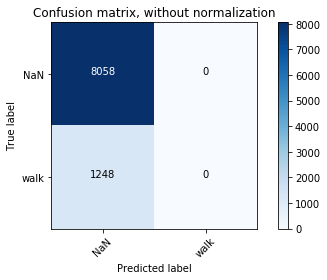

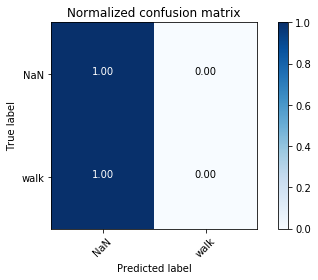

              precision    recall  f1-score   support

         NaN       0.87      1.00      0.93      8058
        walk       0.00      0.00      0.00      1248

   micro avg       0.87      0.87      0.87      9306
   macro avg       0.43      0.50      0.46      9306
weighted avg       0.75      0.87      0.80      9306



/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/admin/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [287]:
acc = accuracy_score(walk_exact, walk_pred)
print(acc)

show_conf_matrix(walk_exact, walk_pred, walk_lbl)
show_clf_report(walk_exact, walk_pred, walk_lbl)

# Combine SVM and Walk Algorithm

In [34]:
y_pred_new = combine(X_test, y_pred)

0.4091093940626271


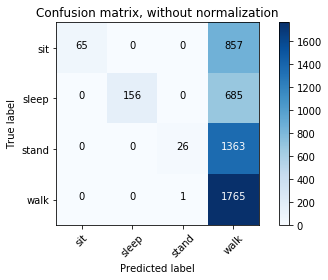

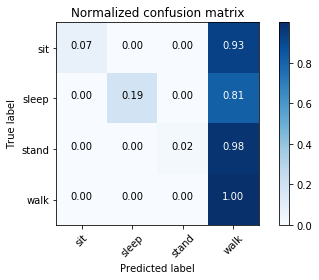

              precision    recall  f1-score   support

         sit       1.00      0.07      0.13       922
       sleep       1.00      0.19      0.31       841
       stand       0.96      0.02      0.04      1389
        walk       0.38      1.00      0.55      1766

   micro avg       0.41      0.41      0.41      4918
   macro avg       0.84      0.32      0.26      4918
weighted avg       0.77      0.41      0.29      4918



In [35]:
acc = accuracy_score(y_test, y_pred_new)
print(acc)

show_conf_matrix(y_test, y_pred_new, LABELS)
show_clf_report(y_test, y_pred_new, LABELS)

# Test Model with Some Subjects

In [ ]:
%run test_model.ipynb

In [ ]:
filename = basepath + 'model/knn_model.pkl'

model = pickle.load(open(filename,'rb'))

In [ ]:
all_subjects = [str(i) for i in range(1001,1009)]
all_subjects.append('2001')
all_subjects.append('2002')

In [ ]:
call_functions(all_subjects)

In [ ]:
all_subjects = [str(i) for i in range(3001,3006)]

call_functions(all_subjects)

In [ ]:
s = '3004'
df_sid = load_actual_timer(s)
df_test = load_data(s, df_sid)

X_vis_imp, ts_list_imp = preprocess_data(df_test, pca)
df_y = predict(X_vis_imp, ts_list_imp)

df_test, df_y = prepare_actual_lb(df_test, df_y, df_sid)

actual_periods = get_actual_periods(df_test)
pred_periods = get_predicted_periods(df_y)
pp_all_run = postprocess_predicted(pred_periods, df_y)

df_y['y_pred'] = pd.Series(pp_all_run)
pp_periods = get_predicted_periods(df_y)
plot_highlighted(s, df_test, pred_periods, pp_periods, actual_periods)

evaluate(df_y)

In [ ]:
LABELS = ['sit', 'sleep', 'stand', 'walk']

df_y_notnull = df_y.dropna()
df_y_notnull = df_y_notnull.reset_index(drop=True)

actual_y = list(df_y_notnull['y_actual'])
pred_y = list(df_y_notnull['y_pred'])

last = len(pred_y)

for i in range(len(pred_y)):
    if(pred_y[i]==-1):
        last = i
        break

pred_y = pred_y[:last]
actual_y = actual_y[:last]

acc = accuracy_score(actual_y, pred_y)
print(acc)

show_conf_matrix(actual_y, pred_y, LABELS)
# show_clf_report(actual_y, pred_y, LABELS)

labels_list = [0,1,2,3]
report = classification_report(actual_y, pred_y, labels_list, output_dict=True)
print(report['macro avg'])

In [ ]:
df_test['x'][2200:].plot()

plt.show()

# Display Table

In [ ]:
from prettytable import PrettyTable

In [ ]:
print(s)
print(df_y)

In [ ]:
label_period = []
period_list = [[] for i in range(len(LABELS))]

first = 0
keep = 0

for i in range(len(df_y)):
    if(calc_sec(df_y.loc[i]['timestamp'].split(' ')[1])>=calc_sec(df_sid.loc[0]['timestamp'].split(' ')[1]) and
       calc_sec(df_y.loc[i]['timestamp'].split(' ')[1])<=calc_sec(df_sid.loc[len(df_sid)-1]['timestamp'].split(' ')[1])):
        
        keep_lb = df_y.loc[keep]['y_pred']

        if(keep_lb!=df_y.loc[i]['y_pred']):
            label_period.append([df_y.loc[keep]['timestamp'], df_y.loc[i-1]['timestamp'], 
                                 df_y.loc[i-1]['y_pred']])

            period_list[df_y.loc[i-1]['y_pred']].append([df_y.loc[keep]['timestamp'], df_y.loc[i-1]['timestamp']])

            keep = i

In [ ]:
labels_list = ['sit', 'sleep', 'stand', 'walk']
headers = ['start', 'end', 'pred']

t = PrettyTable(headers)

for row in label_period:
#     if(calc_sec(row[1].split(' ')[1])-calc_sec(row[0].split(' ')[1])>1):
    t.add_row([row[0], row[1], labels_list[row[2]]])

In [ ]:
print(t)

In [ ]:
print(len(label_period))

label_cnt_list = [0 for i in range(len(labels_list))]
for lb_p in label_period:
    label_i = lb_p[2]
    
    label_cnt_list[label_i] += 1

activity_changes = []
for i in range(len(labels_list)):
    activity_changes.append([labels_list[i], label_cnt_list[i]])
    
print(activity_changes)

In [ ]:
headers = ['Label', 'Activities Count']
tabl_act_chng = PrettyTable(headers)

for ac in activity_changes:
    tabl_act_chng.add_row([ac[0], ac[1]])
    
tabl_act_chng.add_row(['', ''])
tabl_act_chng.add_row(['total changes', len(label_period)])

In [ ]:
print(tabl_act_chng)

## Active Inactive AC (ALL)

In [ ]:
headers = ['Label', 'Activities Count']
tabl_act = PrettyTable(headers)
inactive_table = []
active_table = []

sum = 0
sum_2 = 0
for ac in activity_changes:
    if(ac[0] == 'sit' or ac[0] == 'sleep'):
        sum += ac[1]
    else :
        sum_2 += ac[1]

tabl_act.add_row(['Inactive', sum])
tabl_act.add_row(['Active', sum_2])

In [ ]:
print(tabl_act)

# Convert Time to String Method

In [ ]:
def convert_time_to_string(sec):
    minute = math.floor(sec/60)
    sec = int(sec%60)

    time_string = str(minute) + ':' + str(sec)
    if(sec<10):
        time_string = str(minute) + ':0' + str(sec)
    
    return time_string

# Predicted Duration

In [ ]:
total_secs = []
for i in range(len(period_list)):    
    secs = 0
    for p_i in period_list[i]:
        sec = calc_sec(p_i[1].split(' ')[1]) - calc_sec(p_i[0].split(' ')[1])
        secs += sec
    
    secs = round(secs, 3)
    total_secs.append(secs)
    
percent_secs = [round(t/np.sum(total_secs)*100, 3) for t in total_secs]

tb = PrettyTable(['Label', 'Minutes', 'Percentage', 'Activity Count'])

for i in range(len(LABELS)):
    tb.add_row([labels_list[i], convert_time_to_string(total_secs[i]), percent_secs[i], label_cnt_list[i]])

tb.add_row(['', '', '',''])
tb.add_row(['total', convert_time_to_string(round(np.sum(total_secs), 3)), 
            round(np.sum(percent_secs), 3), len(label_period)])

# Actual Duration

In [ ]:
df_lb = df_sid.groupby('label')

dura_dict = {}
for lb in labels_list:
    dura_dict[lb] = 0

idx = list(df_sid.index)
for i in range(len(labels_list)):
    lb = labels_list[i]
    df_temp = df_lb.get_group(lb)
    df_temp = df_temp.reset_index(drop=True)
        
    if(lb=='downstairs' or lb=='upstairs'):
        lb = 'walk'
    
    for j in range(len(df_temp)):
        dura_dict[lb] += calc_sec(df_temp.loc[j]['duration'])
        
total_dura = np.sum([dura_dict[lb] for lb in labels_list])

percent_list = []
        
tabl = PrettyTable(['Label', 'Minutes', 'Percentage'])
for lb in labels_list:
    percent = round(dura_dict[lb]/total_dura*100, 3)
    tabl.add_row([lb, convert_time_to_string(dura_dict[lb]), round(dura_dict[lb]/total_dura*100, 3)])
    
    percent_list.append(percent)
    
tabl.add_row(['', '', ''])    
tabl.add_row(['total', convert_time_to_string(total_dura), round(np.sum(percent_list), 3)])

# Activity Durations Table

In [ ]:
print('Prediction')
print(tb)

print('Actual')
print(tabl)

# Bar Chart for Every 5 Minutes

In [ ]:
s_idx = 0
f_idx = 1
lb_idx = 2

## Separate Each 5 Minutes

In [ ]:
fivemin = 60*5
new_label_period = []

start_time = calc_sec(label_period[0][s_idx].split(' ')[1])
finish_time = calc_sec(label_period[-1][f_idx].split(' ')[1])

floor_start = start_time - (start_time%fivemin)
ceil_finish = finish_time - (finish_time%fivemin) + fivemin

print(calc_ts(floor_start), calc_ts(ceil_finish))

tm_s = floor_start
tm_f = floor_start + fivemin
date = label_period[0][s_idx].split(' ')[0]

for prd in label_period:
    if(calc_sec(prd[f_idx].split(' ')[1])>=tm_f):
        new_prd = [prd[s_idx], date + ' ' + calc_ts(tm_f), prd[lb_idx]]
        new_label_period.append(new_prd)
        
        tm_s += fivemin
        tm_f += fivemin
    else:
        new_label_period.append(prd)
                
    if(calc_sec(prd[s_idx].split(' ')[1])<tm_s):
        new_prd = [date + ' ' + calc_ts(tm_s), prd[f_idx], prd[lb_idx]]
        new_label_period.append(new_prd)

In [ ]:
all_periods_label = []

for t_i in range(int(floor_start), int(ceil_finish), fivemin):
    period_lb = [0 for i in range(len(LABELS))]
    for prd in new_label_period:
        if(calc_sec(prd[s_idx].split(' ')[1])>=t_i and calc_sec(prd[f_idx].split(' ')[1])<=t_i+fivemin):
            period_lb[prd[lb_idx]] += calc_sec(prd[f_idx].split(' ')[1])-calc_sec(prd[s_idx].split(' ')[1])
            period_lb[prd[lb_idx]] = round(period_lb[prd[lb_idx]], 3)
            
    all_periods_label.append(period_lb)

In [ ]:
df_all = pd.DataFrame(all_periods_label, columns=labels_list)

## Plot Bar Graph

In [ ]:
pos = list(range(len(df_all['sit'])))
width = 0.2
colors = ['crimson','gold','lime','dodgerblue']

fig, ax = plt.subplots(figsize=(10,5))

for i in range(len(LABELS)):
    plt.bar([p + i*width for p in pos],
            df_all[labels_list[i]],
            width,
            alpha=0.5,
            color=colors[i],
            label=labels_list[i])
    
ax.set_xticks([p + 1.5 * width for p in pos])

xtick_labels = [calc_ts(floor_start + i*fivemin) + '-' + calc_ts(floor_start + (i+1)*fivemin)
                for i in range(len(df_all))]
ax.set_xticklabels(xtick_labels)

ax.set_ylabel('Time (sec)')

plt.xlim(min(pos)-width, max(pos)+width*4)
plt.legend(loc='upper left')
plt.title('Activity Summary for Subject ID: ' + s)

plt.show()